# Regresiones No lineales

1. **Logaritmica**
2. **Polinomial**
3. **Exponencial**

In [180]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [136]:
df = pd.read_excel('DATOS.xlsx', sheet_name=0,header=1)
df

,PUB,VEL,TIRANTE,GASTO,FROUDE,Tc,TIEMPO,HUM.INI,HUM.FIN,DIF.HUM,...,INF.FLUI,IND.TENA,GRAVA,ARENA,FINOS,DEN.SOL,PVN,PVS,COHE,FRIC
0,1.0,2.316,0.0718,0.0974,2.760,41.02,1878.0,40.70,53.15,12.45,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
1,2.0,2.316,0.0718,0.0974,2.760,41.02,727.0,45.60,47.78,2.18,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
2,3.0,2.410,0.0742,0.1073,2.824,43.91,2627.0,42.30,49.27,6.97,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
3,4.0,1.807,0.0788,0.0855,2.149,24.21,2059.0,44.90,46.73,1.83,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
4,5.0,1.774,0.0788,0.0839,2.149,23.33,2059.0,40.10,48.83,8.73,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
5,6.0,1.293,0.1240,0.0962,1.768,10.66,2841.0,46.60,47.63,1.03,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
6,7.0,1.360,0.1240,0.1011,1.768,11.78,2841.0,43.63,53.54,9.91,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
7,8.0,2.758,0.0650,0.1030,3.306,60.13,259.0,35.90,36.68,0.78,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
8,9.0,2.758,0.0650,0.1030,3.306,60.13,199.0,35.90,36.50,0.60,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0
9,10.0,0.884,0.1816,0.0952,0.655,4.39,3752.0,43.63,52.73,9.10,...,7.79,3.58,1.0,6.0,93.0,2.789,1608.0,1120.0,0.48,11.0


In [177]:
# Función exponencial
def func(T, a, b):
    return a * numpy.exp(-b*T)

# Función Logaritmica
def funcL(x, a, b, c, d):
    return a * numpy.exp(-b * (x - c)) + d

def sumOfSquaredError(parameterTuple):
    val = funcL(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)

##########################################################
def ModelAndScatterPlot(graphWidth, graphHeight,name,xlabel,ylabel,c,xModel,yModel):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'o')

    # now the model as a line plot
    axes.plot(xModel, yModel,color=c)

    axes.set_xlabel(xlabel) # X axis data label
    axes.set_ylabel(ylabel) # Y axis data label
    plt.title(name)
    plt.grid()
    plt.show()
    plt.close('all') # clean up after using pyplot

# Función Exponencial TEP-ALL

Fitted parameters: [1.0530443  0.00595811]


PUB
RMSE: 2.82416578421589
R-squared: 0.0015025936996577727



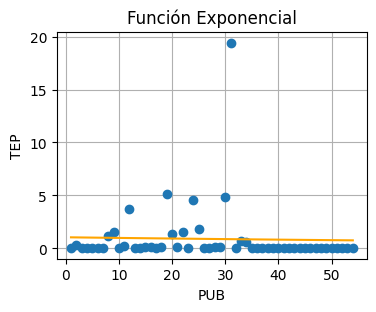

Fitted parameters: [ 1.71258141e-04 -3.54471979e+00]


VEL
RMSE: 2.617324890663838
R-squared: 0.1430062938075768



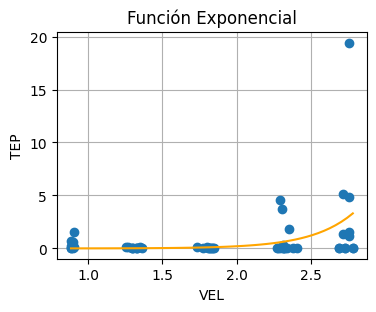

Fitted parameters: [1.65778830e+23 8.36204181e+02]


TIRANTE
RMSE: 2.0974775968509163
R-squared: 0.4585565115528708



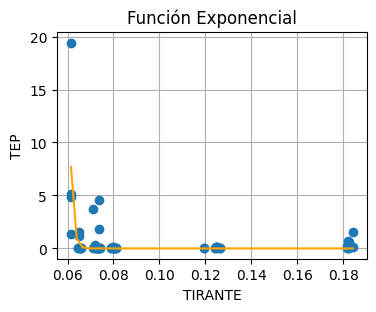

Fitted parameters: [  0.23215496 -13.86231749]


GASTO
RMSE: 2.8244434645877865
R-squared: 0.0013060800159672148



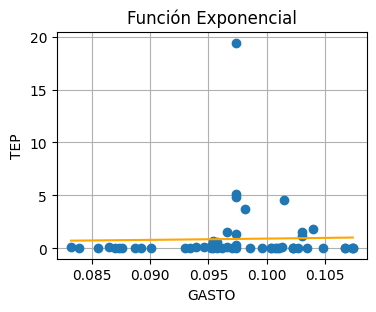

Fitted parameters: [ 1.30267663e-46 -3.16837228e+01]


FROUDE
RMSE: 2.097504654859327
R-squared: 0.4586418125142969



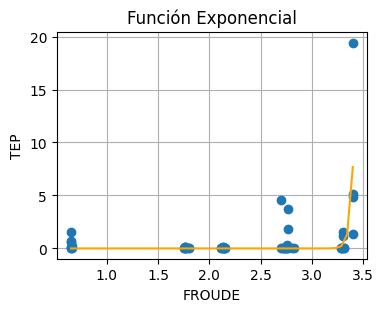

Fitted parameters: [1.64004222 0.30823923]


Tc
RMSE: 2.960198684210921
R-squared: -0.012233942163452083



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


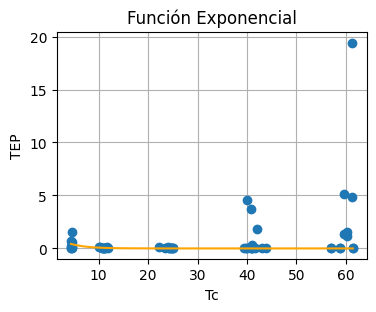

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


TIEMPO
RMSE: 2.9645944283983625
R-squared: 4.816388399220273e-10



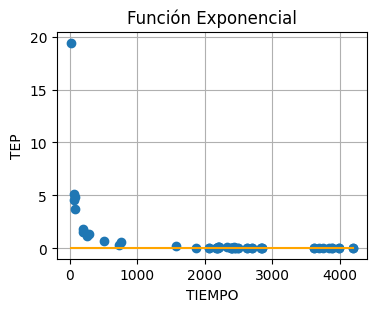

Fitted parameters: [23.91911006  0.210311  ]


HUM.INI
RMSE: 2.5077095515365224
R-squared: 0.2139782234061327



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


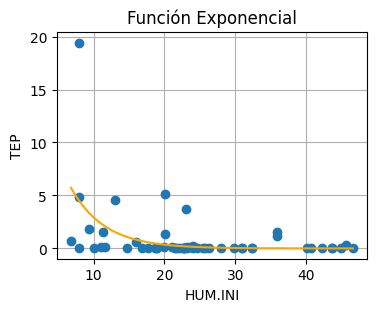

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [2.96554449e+11 2.89846398e+00]


HUM.FIN
RMSE: 1.1676608075460861
R-squared: 0.8541480951542612



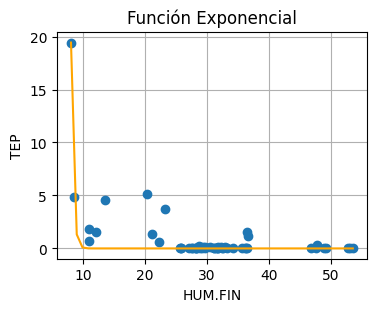

Fitted parameters: [93.91777633 10.0049008 ]


DIF.HUM
RMSE: 1.00839179226116
R-squared: 0.8867073070289742



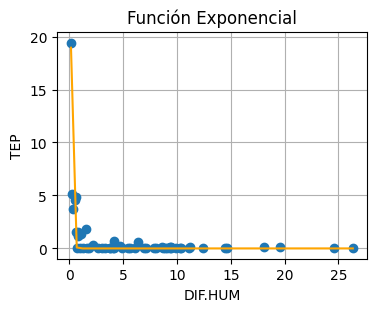

Fitted parameters: [3.10393644e+12 2.68891334e+01]


DIF.HUM.P
RMSE: 2.4655727427055165
R-squared: 0.23983188608862482



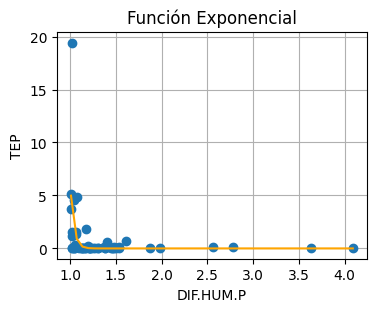

Fitted parameters: [61.90161658  2.57557129]


PESO.VOL
RMSE: 2.785104409417992
R-squared: 0.029031463701968074



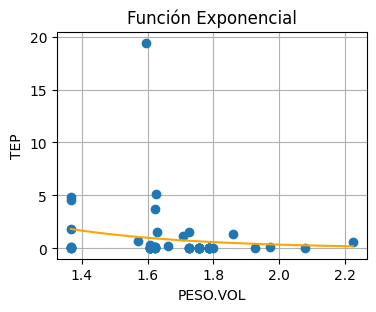

Fitted parameters: [ 0.64090239 -0.17616414]


TEP
RMSE: 1.0316514706317952
R-squared: 0.8709092431847258



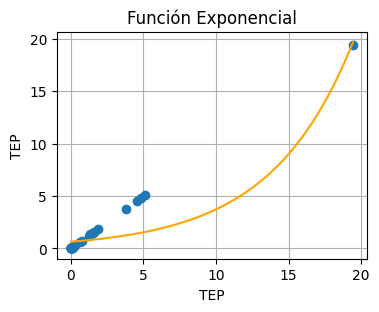

Fitted parameters: [ 0.64154284 -2.60244732]


TEA
RMSE: 1.0055886747129719
R-squared: 0.8781324372853286



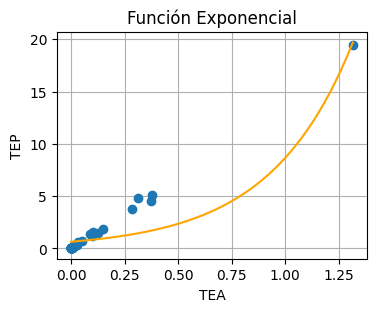

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [14.73316873  0.20419797]


HUM.NAT
RMSE: 2.648328173205757
R-squared: 0.12591368611174458



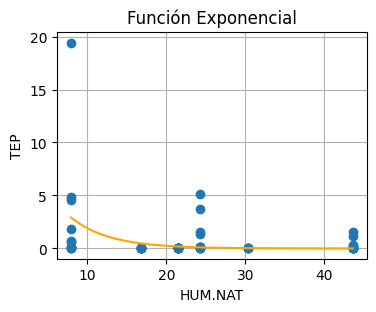

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


LL
RMSE: 2.9645944290785455
R-squared: 4.6629367034256575e-15



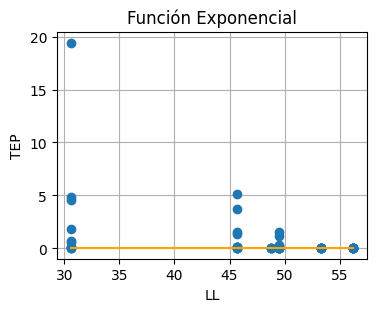

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [1.35882109 0.85917373]


LP
RMSE: 2.9645944267768263
R-squared: 3.5666625208818914e-10



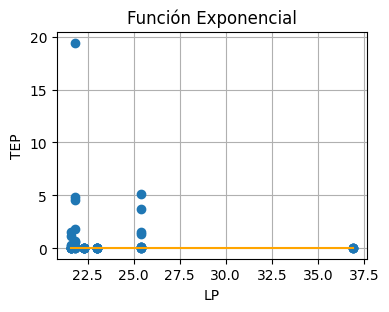

Fitted parameters: [8.87465929 0.13734011]


LC
RMSE: 2.8039674440415423
R-squared: 0.01574257212824748



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


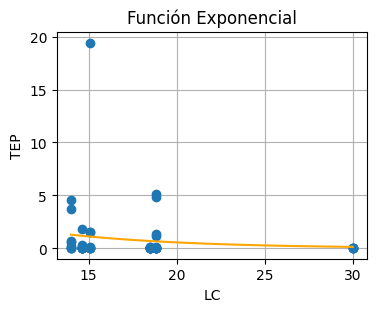

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [8.82128751 0.13686475]


IP
RMSE: 2.6576785060983594
R-squared: 0.11589704709807325



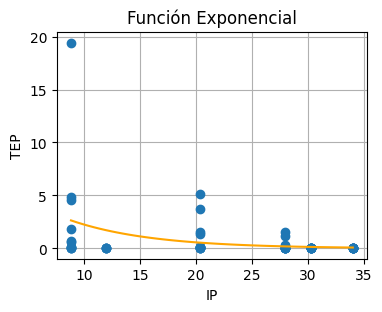

Fitted parameters: [8.99936054 0.14211814]


IP.EN.LINEA.A
RMSE: 2.614827650837716
R-squared: 0.14422815748481843



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


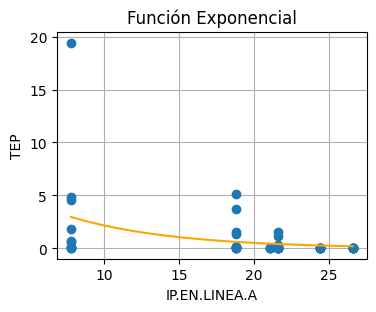

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [1.18126833 0.87612571]


CONS.REL
RMSE: 2.9645944288251718
R-squared: -3.7286440601747017e-10



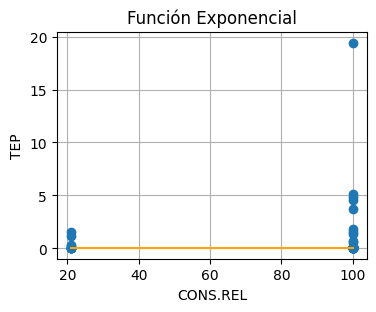

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [3.56399295e+03 1.20318406e+00]


INF.FLUI
RMSE: 2.6465648304431655
R-squared: 0.12991463571836026



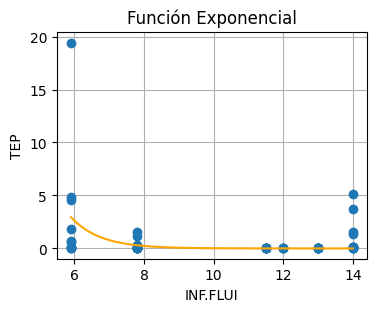

Fitted parameters: [3.43299286 0.65899416]


IND.TENA
RMSE: 2.77320032580396
R-squared: 0.03742050161671151



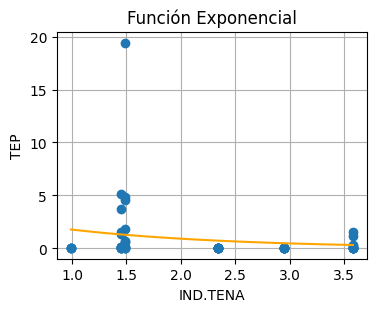

Fitted parameters: [1.15438587 1.35175664]


GRAVA
RMSE: 2.7943107883567184
R-squared: 0.022500947514626946



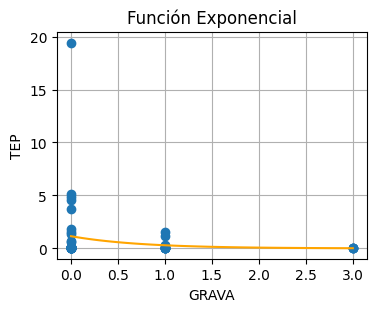

Fitted parameters: [4100.5310402     4.14081417]


ARENA
RMSE: 2.923895580655021
R-squared: -0.01543363234898254



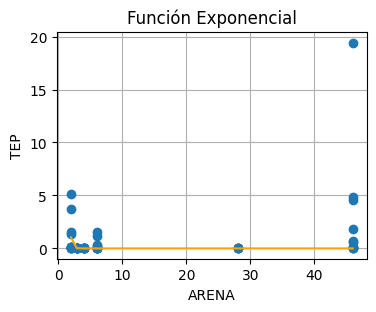

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


FINOS
RMSE: 2.964594429078556
R-squared: 0.0



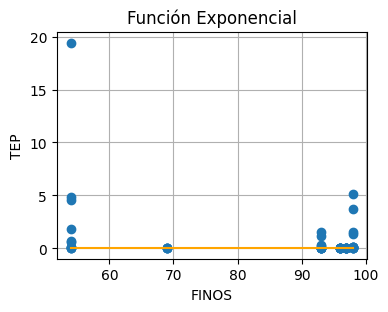

Fitted parameters: [ 4.14821712e-05 -3.65659170e+00]


DEN.SOL
RMSE: 2.819627205217797
R-squared: 0.0047181976971326645



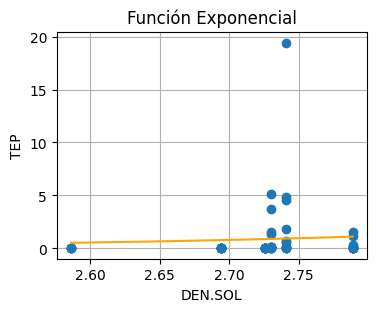

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


PVN
RMSE: 2.964594429078556
R-squared: 0.0



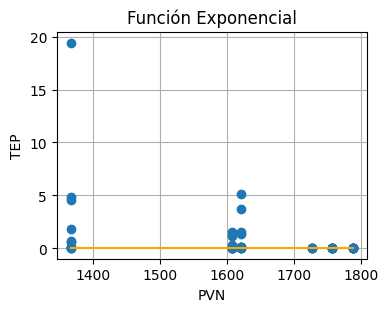

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


PVS
RMSE: 2.964594429078556
R-squared: 0.0



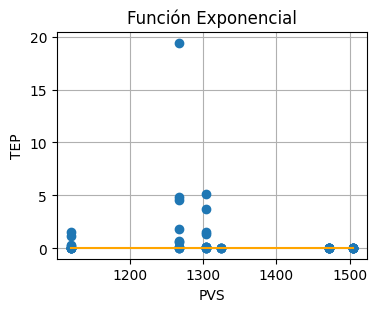

Fitted parameters: [ 0.11456288 -2.94647295]


COHE
RMSE: 2.6348167085815635
R-squared: 0.1310247873353464



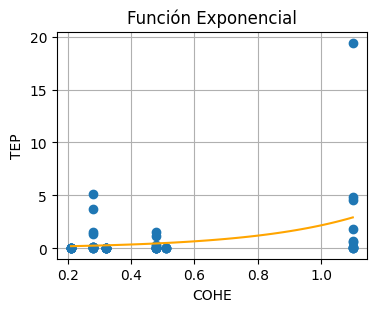

Fitted parameters: [7.64374335 0.48104925]


FRIC
RMSE: 2.6493804609153497
R-squared: 0.12582549791168285



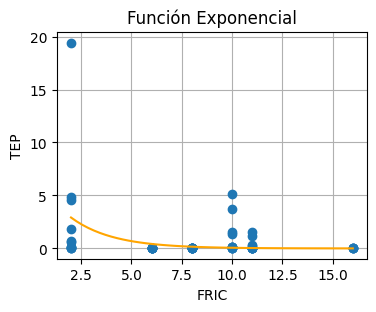

In [183]:
for index in df:
    xData = numpy.array(df[index])
    yData = numpy.array(df['TEP'])

    init_vals = [50, 0, 90, 63]
    fittedParameters, pcov = curve_fit(func, xData, yData, maxfev=5000)
    print('Fitted parameters:', fittedParameters)
    print()

    modelPredictions = func(xData, *fittedParameters) 

    absError = modelPredictions - yData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

    print()
    print(index)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()

    graphWidth = 400
    graphHeight = 300
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)
    ModelAndScatterPlot(graphWidth, graphHeight,'Función Exponencial',index,'TEP','orange',xModel,yModel)
    

# Función Logaritmica TEP-ALL

Fitted parameters: [6.15811438e-01 5.95485070e-03 9.00715942e+01 2.42794464e-07]


PUB
RMSE: 2.824165781684396
R-squared: 0.0015025629381314465



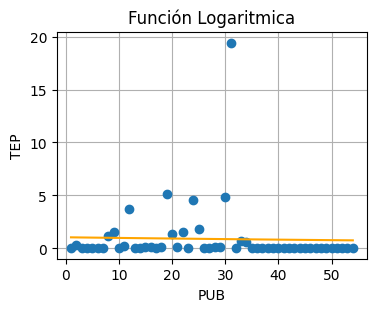

Fitted parameters: [3.95990057e-01 3.37721213e-57 9.00000000e+01 4.98947475e-01]


VEL
RMSE: 2.8262885556887785
R-squared: -4.440892098500626e-16



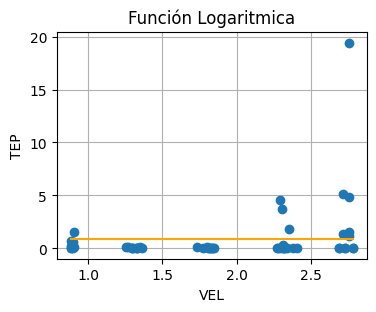

Fitted parameters: [2.54840631e-04 9.08270056e-02 9.00012247e+01 3.85125468e-04]


TIRANTE
RMSE: 2.8256574418819795
R-squared: 0.0004470461315161378



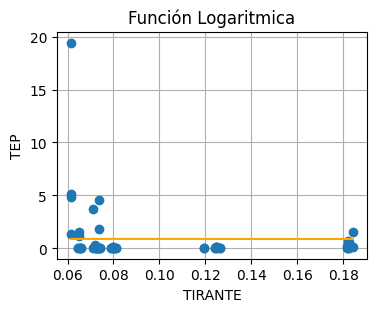

Fitted parameters: [3.95990066e-01 8.90372007e-59 9.00000000e+01 4.98947476e-01]


GASTO
RMSE: 2.8262885556887793
R-squared: -6.661338147750939e-16



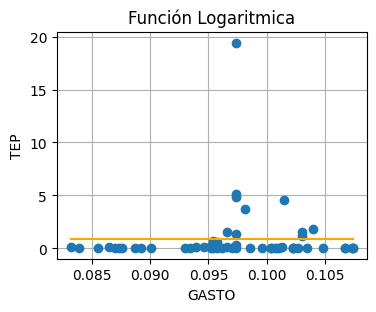

Fitted parameters: [3.95990042e-01 7.52196196e-55 9.00000000e+01 4.98947458e-01]


FROUDE
RMSE: 2.8262885556887785
R-squared: -8.881784197001252e-16



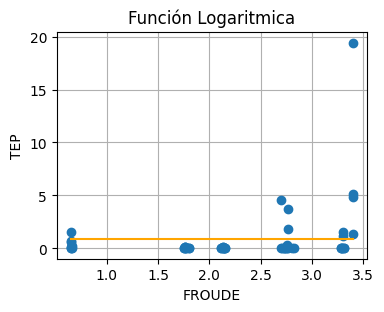

Fitted parameters: [3.96204628e-01 8.19348396e-71 9.00000000e+01 4.99217828e-01]


Tc
RMSE: 2.826288597295088
R-squared: -4.440892098500626e-16



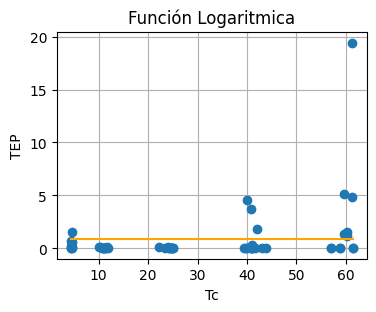

Fitted parameters: [2.77662763e+00 2.71261704e-02 9.00806152e+01 2.03938216e-01]


TIEMPO
RMSE: 0.44395228032224904
R-squared: 0.9753259987625436



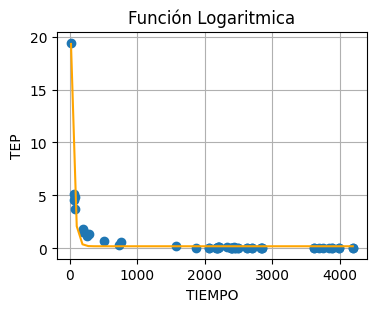

Fitted parameters: [9.35288756e-04 1.00000000e-01 9.01264062e+01 8.75910523e-14]


HUM.INI
RMSE: 2.5661429906797824
R-squared: 0.18072566592500916



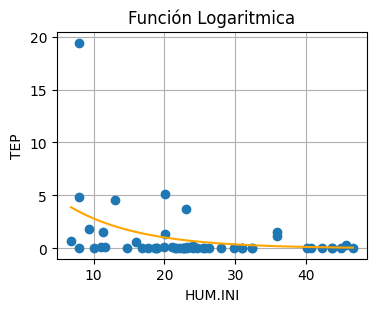

Fitted parameters: [2.01056830e-03 9.99999982e-02 9.00000251e+01 5.08272693e-17]


HUM.FIN
RMSE: 2.093169767644528
R-squared: 0.4720288828668492



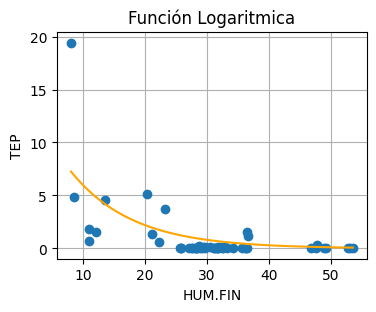

Fitted parameters: [2.50248945e-04 9.99999993e-02 9.00000110e+01 1.00120381e-13]


DIF.HUM
RMSE: 2.6645778609909114
R-squared: 0.12186659389005838



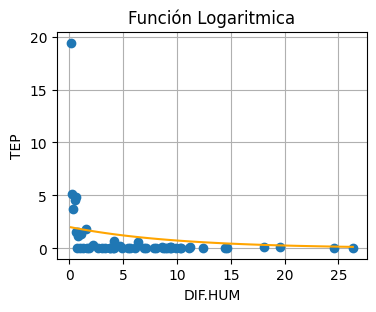

Fitted parameters: [1.22941633e-04 1.00000000e-01 9.05964397e+01 1.48649158e-16]


DIF.HUM.P
RMSE: 2.817507115871471
R-squared: 0.006288494202383643



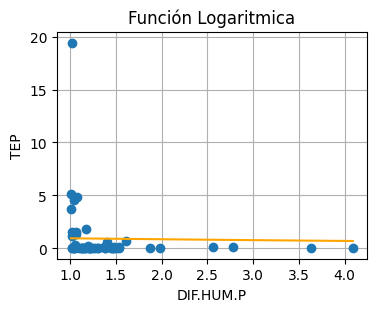

Fitted parameters: [1.31756893e-04 9.99999981e-02 9.00017312e+01 3.95148149e-13]


PESO.VOL
RMSE: 2.823482182763739
R-squared: 0.001994354253199715



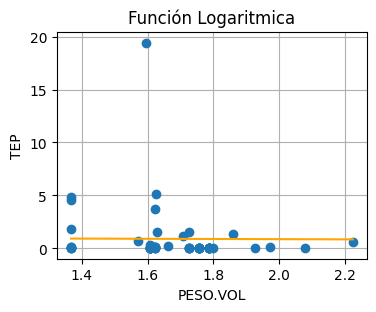

Fitted parameters: [3.96101237e-01 2.79477072e-65 9.00000000e+01 4.99087559e-01]


TEP
RMSE: 2.826288566860643
R-squared: -2.220446049250313e-16



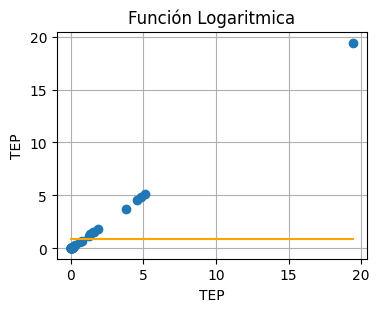

Fitted parameters: [3.95990041e-01 3.79802882e-26 9.00000000e+01 4.98947459e-01]


TEA
RMSE: 2.8262885556887785
R-squared: 0.0



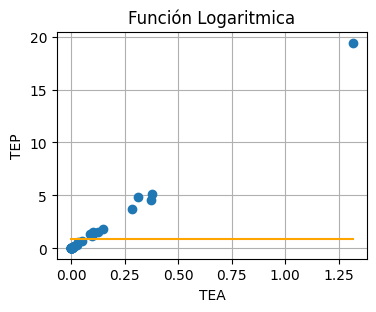

Fitted parameters: [7.06657251e-04 1.00000000e-01 9.00775617e+01 3.76587601e-13]


HUM.NAT
RMSE: 2.664199876749347
R-squared: 0.11165263268885628



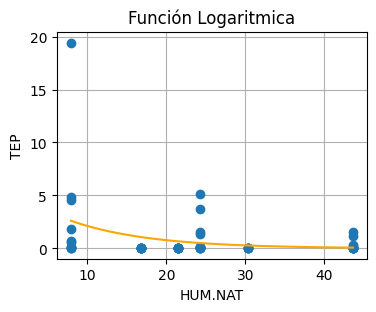

Fitted parameters: [7.77262500e-03 9.99997725e-02 9.00000515e+01 2.99875348e-13]


LL
RMSE: 2.6151117820289165
R-squared: 0.14426025435715895



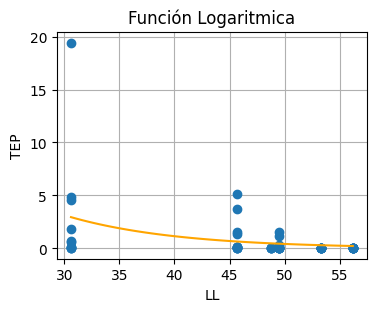

Fitted parameters: [1.15830973e-03 9.99999918e-02 9.00055863e+01 1.24617411e-20]


LP
RMSE: 2.8128196722373824
R-squared: 0.009529519972353184



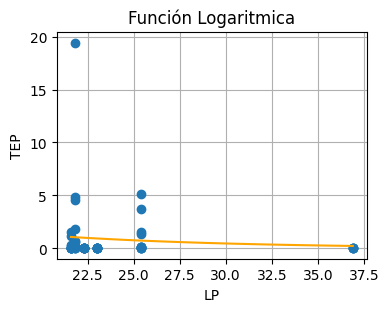

Fitted parameters: [6.10412893e-04 9.99972441e-02 9.00000310e+01 2.49379435e-11]


LC
RMSE: 2.8050291501223077
R-squared: 0.015073813959909588



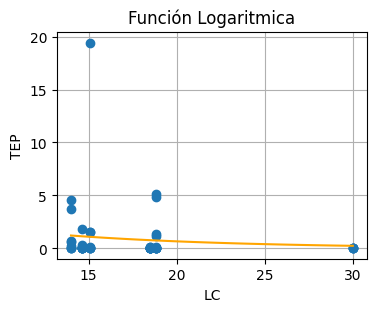

Fitted parameters: [7.42933108e-04 9.99999738e-02 9.00000138e+01 1.91539589e-14]


IP
RMSE: 2.661763634537992
R-squared: 0.11370773903447196



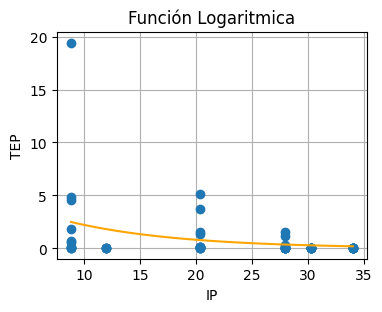

Fitted parameters: [7.27992142e-04 1.00000000e-01 9.00357879e+01 1.29021203e-12]


IP.EN.LINEA.A
RMSE: 2.628545700181586
R-squared: 0.13949174435588652



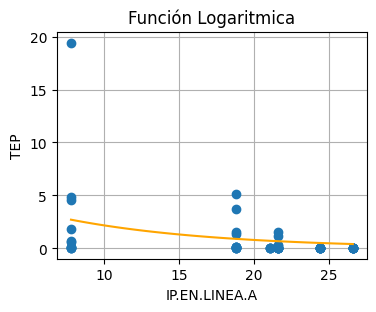

Fitted parameters: [3.96048891e-01 4.08602443e-60 9.00000000e+01 4.99021573e-01]


CONS.REL
RMSE: 2.8262885588164672
R-squared: -4.440892098500626e-16



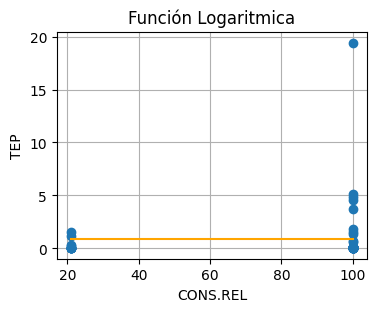

Fitted parameters: [3.38924396e-04 1.00000000e-01 9.00499699e+01 2.21786567e-25]


INF.FLUI
RMSE: 2.7629845409775844
R-squared: 0.04636085786921962



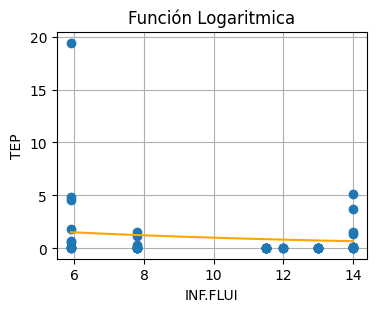

Fitted parameters: [1.42170755e-04 1.00000000e-01 9.01285280e+01 9.96922267e-16]


IND.TENA
RMSE: 2.810696846829156
R-squared: 0.011247098842779635



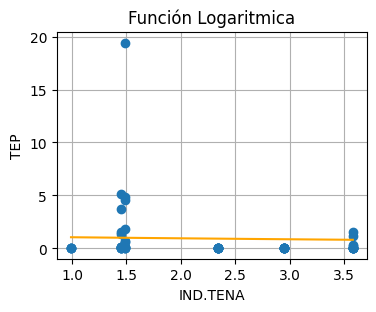

Fitted parameters: [1.88297136e-05 1.00000000e-01 1.08354443e+02 1.22644887e-16]


GRAVA
RMSE: 2.817540164026563
R-squared: 0.006256378221418002



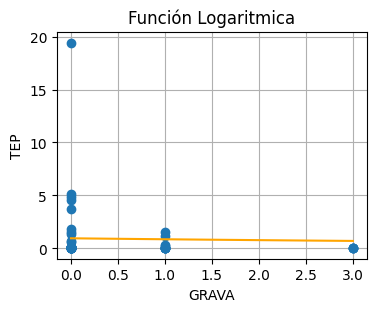

Fitted parameters: [3.96089986e-01 4.35595484e-60 9.00000000e+01 4.99073360e-01]


ARENA
RMSE: 2.826288564712359
R-squared: -6.661338147750939e-16



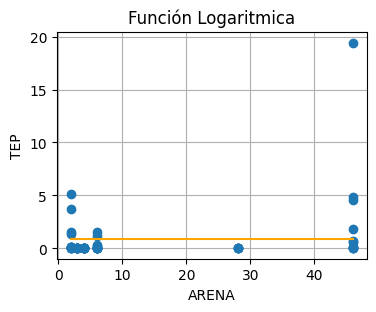

Fitted parameters: [7.03972364e-02 9.99999997e-02 9.00000447e+01 2.98975919e-01]


FINOS
RMSE: 2.6391748641696418
R-squared: 0.12802640746512084



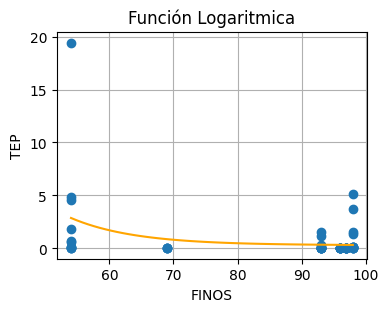

Fitted parameters: [3.95990055e-01 1.02484415e-57 9.00000000e+01 4.98947452e-01]


DEN.SOL
RMSE: 2.8262885556887785
R-squared: 0.0



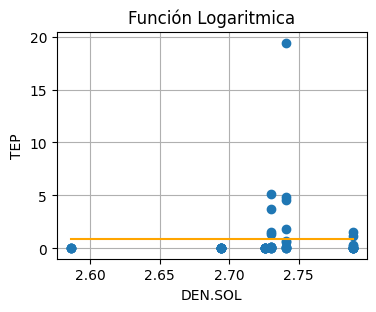

Fitted parameters: [2.39234755e+01 5.23696722e-02 9.00000000e+01 8.94937583e-01]


PVN
RMSE: 2.82628855568878
R-squared: -6.661338147750939e-16



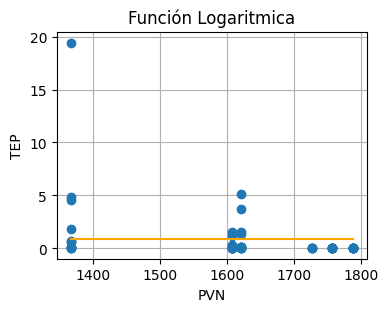

Fitted parameters: [2.28368645e+01 5.42384731e-02 9.00000000e+01 8.94937560e-01]


PVS
RMSE: 2.8262885556887793
R-squared: -4.440892098500626e-16



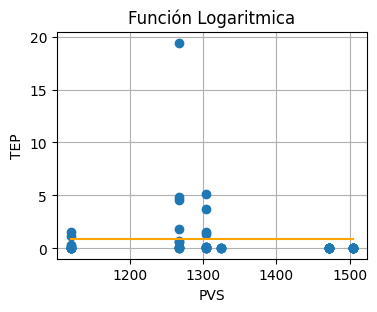

Fitted parameters: [6.29041450e-04 9.81297552e-08 9.07311278e+01 8.94308405e-01]


COHE
RMSE: 2.826288555695482
R-squared: -4.743538895013444e-12



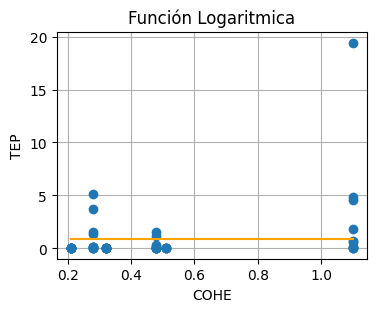

Fitted parameters: [2.76654163e-04 9.99999882e-02 9.00000740e+01 5.19106314e-13]


FRIC
RMSE: 2.7291627715652096
R-squared: 0.07157113905330181



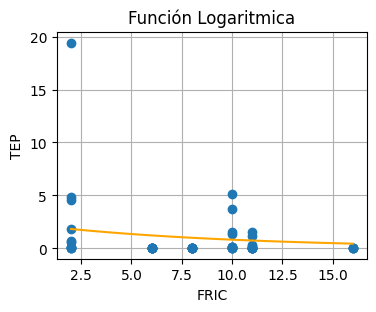

In [186]:
for index in df:
    xData = numpy.array(df[index])
    yData = numpy.array(df['TEP'])

    init_vals = [50, 0, 90, 63]
    fittedParameters, pcov = curve_fit(funcL, xData, yData, p0=init_vals, bounds=([0, 0, 90, 0], [1000, 0.1, 200, 200]))
    print('Fitted parameters:', fittedParameters)
    print()

    modelPredictions = funcL(xData, *fittedParameters) 

    absError = modelPredictions - yData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

    print()
    print(index)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = funcL(xModel, *fittedParameters)
    graphWidth = 400
    graphHeight = 300
    ModelAndScatterPlot(graphWidth, graphHeight,'Función Logaritmica',index,'TEP','orange',xModel,yModel)

# Función Polinomial grado 9 TEP-ALL

PUB
R-squared: 0.15091535466027195
0.4694136958312666
[ 0.00000000e+00 -4.92066698e-02 -1.57244972e-01  5.54874577e-02
 -7.12845565e-03  4.59867139e-04 -1.64229215e-05  3.29390610e-07
 -3.47521733e-09  1.50149893e-11]


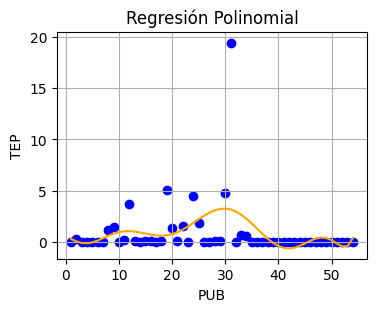

VEL
R-squared: 0.21640806862452266
77812.09866370178
[ 0.00000000e+00 -4.60684984e+05  1.18361876e+06 -1.73260176e+06
  1.59334049e+06 -9.55339704e+05  3.73784240e+05 -9.21111286e+04
  1.29855371e+04 -7.98724774e+02]


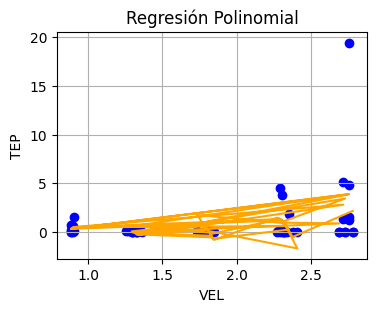

TIRANTE
R-squared: 0.46734442202673554
164599.59934719966
[ 0.00000000e+00 -1.40273747e+07  5.21658814e+08 -1.11077248e+10
  1.49216372e+11 -1.31142384e+12  7.54143423e+12 -2.73693243e+13
  5.69042679e+13 -5.16680448e+13]


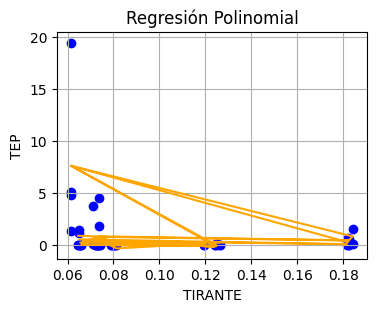

GASTO
R-squared: 0.12204586930304406
486014288.08262205
[ 0.00000000e+00 -3.98431687e+10  1.42293513e+12 -2.88788980e+13
  3.63459643e+14 -2.89093148e+15  1.40247861e+16 -3.64666278e+16
  2.94739949e+16  3.83364483e+16]


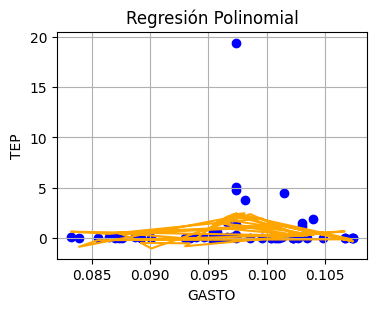

FROUDE
R-squared: 0.47447466351028555
-13065.981825620294
[ 0.00000000e+00  7.93317244e+04 -1.99634919e+05  2.74628847e+05
 -2.29842193e+05  1.22436756e+05 -4.18075118e+04  8.87291532e+03
 -1.06672630e+03  5.55451111e+01]


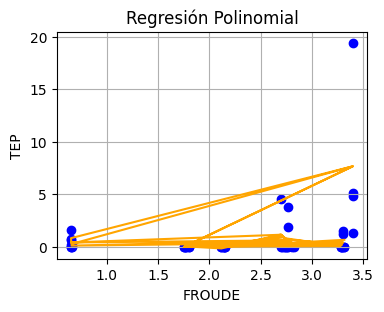

Tc
R-squared: 0.25988844329743155
0.5278828158211891
[ 0.00000000e+00 -4.97738411e-05 -4.94643983e-04 -2.36825549e-03
  3.81101714e-04 -2.62537751e-05  9.68053406e-07 -1.96924181e-08
  2.06775851e-10 -8.71030963e-13]


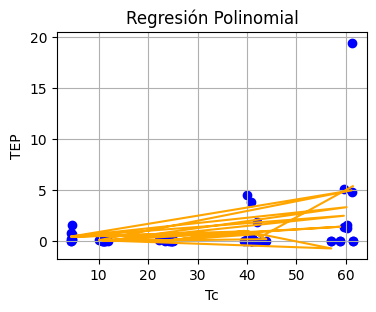

TIEMPO
R-squared: 0.26392938127218113
3.3394461077131465
[ 0.00000000e+00  6.78291448e-22  2.05709499e-27 -2.19819860e-28
 -3.43076800e-25 -4.34719729e-22 -3.49300958e-19  2.75946664e-22
 -7.29364925e-26  6.42997300e-30]


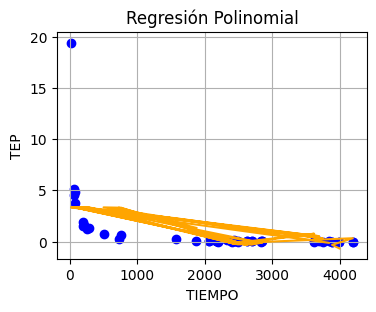

HUM.INI
R-squared: 0.24622800342060003
-17.882813586156058
[ 0.00000000e+00  5.61370612e-01  2.68952205e+00 -6.60682228e-01
  6.99776229e-02 -4.06380201e-03  1.38643366e-04 -2.77210992e-06
  3.00774291e-08 -1.36754830e-10]


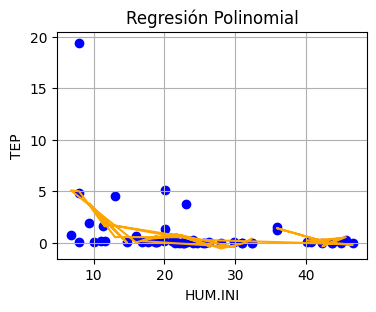

HUM.FIN
R-squared: 0.650267857623783
30.286741107260955
[ 0.00000000e+00 -2.13717746e-03 -2.53740696e-02 -1.29745818e-01
  2.04257198e-02 -1.35083335e-03  4.75165825e-05 -9.31474536e-07
  9.62002165e-09 -4.08511857e-11]


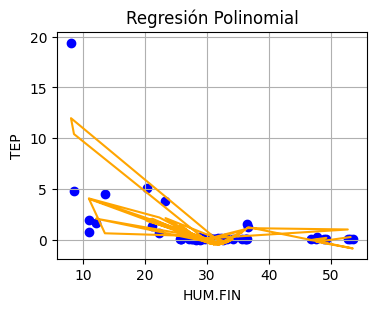

DIF.HUM
R-squared: 0.6798493166139723
14.988417306229879
[ 0.00000000e+00 -2.72048169e+01  1.74969317e+01 -5.49177756e+00
  9.63569314e-01 -1.00736623e-01  6.39916900e-03 -2.41632039e-04
  4.97587482e-06 -4.29514770e-08]


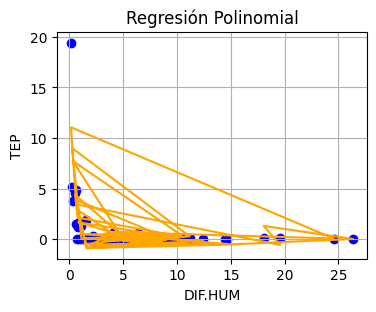

DIF.HUM.P
R-squared: 0.23562135001250695
24227.47765457478
[ 0.00000000e+00 -1.17471211e+05  2.47703499e+05 -2.97824293e+05
  2.24804602e+05 -1.10385870e+05  3.52383668e+04 -7.04920535e+03
  8.01691330e+02 -3.94945616e+01]


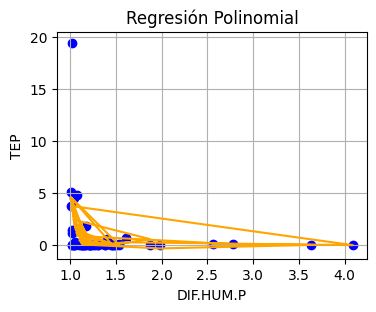

PESO.VOL
R-squared: 0.1145148040904641
1432477034.402652
[ 0.00000000e+00 -7.31295327e+09  1.65484817e+10 -2.17870351e+10
  1.83917922e+10 -1.03238691e+10  3.85358140e+09 -9.22371546e+08
  1.28462929e+08 -7.93211423e+06]


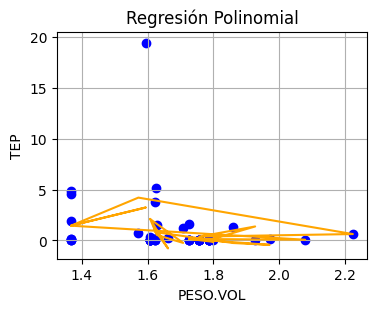

TEP
R-squared: 0.9999999999839769
-2.492158102995745e-06
[ 0.00000000e+00  1.00000144e+00 -1.12841045e-06  2.76460610e-06
 -2.48244070e-06  1.15272179e-06 -2.97121722e-07  4.20777536e-08
 -2.95609597e-09  7.39420747e-11]


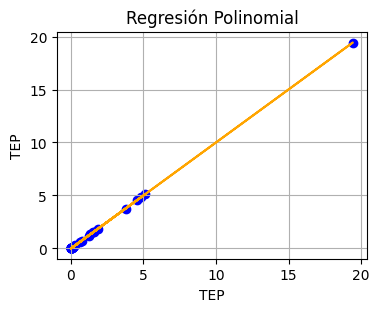

TEA
R-squared: 0.9996757418136737
0.009195832177996688
[ 0.00000000e+00  3.03255419e+00  1.08971920e+03 -3.30619382e+04
  4.71137034e+05 -3.58185619e+06  1.49657771e+07 -3.36289324e+07
  3.66452361e+07 -1.39141868e+07]


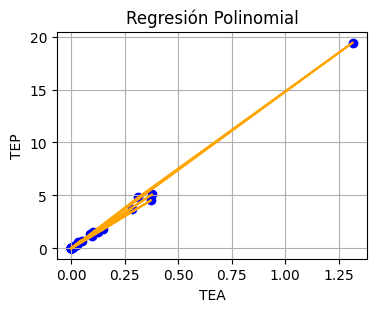

HUM.NAT
R-squared: 0.15312851763596147
3.29842643155317
[ 0.00000000e+00 -2.71141472e-09 -4.94630781e-08 -6.06843387e-07
 -5.36723934e-06 -2.76238564e-05  2.89706348e-06 -1.06849899e-07
  1.60392906e-09 -7.86091998e-12]


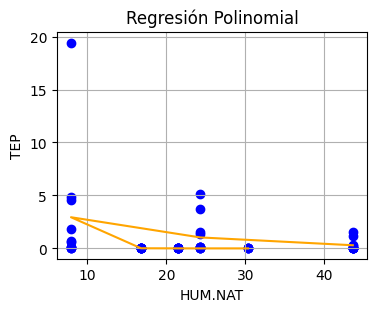

LL
R-squared: 0.1531285176359617
-366.6727903883813
[ 0.00000000e+00  6.85853140e-10  4.03316880e-08  1.18372079e-06
  2.41705980e-05  2.78852263e-04 -2.01829561e-05  5.56280727e-07
 -6.89024443e-09  3.22504652e-11]


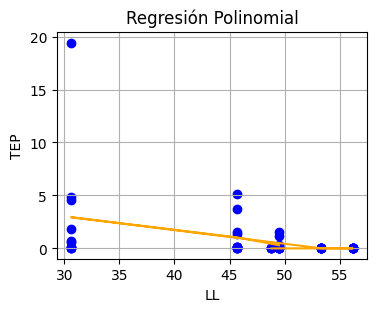

LP
R-squared: 0.15312851763641033
-52983.78222401103
[ 0.00000000e+00  3.88225966e-05  6.99011242e-04  1.08876826e-02
  1.17524549e-01  7.12268614e-01 -9.57042323e-02  4.87126601e-03
 -1.11032007e-04  9.50743479e-07]


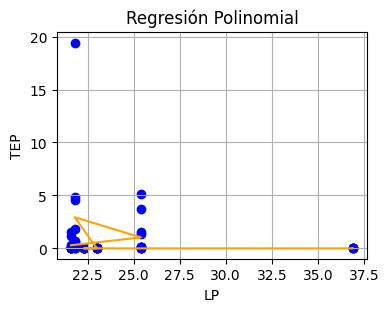

LC
R-squared: 0.11318976870068975
945.8588049108428
[ 0.00000000e+00 -1.07542919e-05 -1.84123880e-04 -2.03801064e-03
 -1.56664544e-02 -6.74840656e-02  1.26657100e-02 -8.85992479e-04
  2.74492302e-05 -3.15725501e-07]


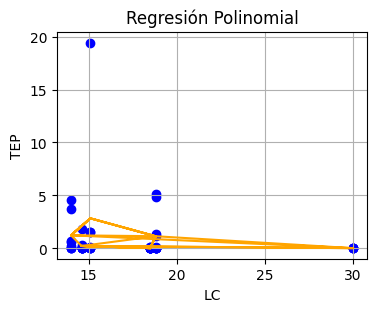

IP
R-squared: 0.15312851763596147
5.368415246365461
[ 0.00000000e+00 -2.74063312e-08 -4.61200813e-07 -5.19429663e-06
 -4.20128669e-05 -1.97110979e-04  2.86633806e-05 -1.53728494e-06
  3.63102831e-08 -3.19051338e-10]


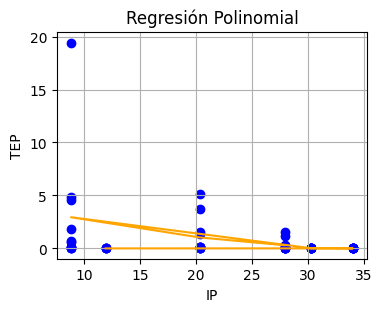

IP.EN.LINEA.A
R-squared: 0.15312851763596158
-4.913034266258561
[ 0.00000000e+00  1.84758365e-07  3.16399881e-06  3.60123303e-05
  2.91284211e-04  1.34567782e-03 -2.40292948e-04  1.58242282e-05
 -4.60281425e-07  4.99737655e-09]


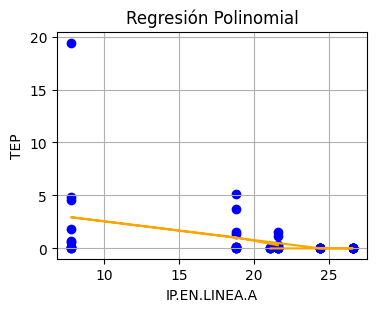

CONS.REL
R-squared: 0.011332853650773522
0.3000642296598921
[ 0.00000000e+00 -9.62964972e-35  7.14096966e-33  7.40077889e-31
  7.45528686e-29  7.46672264e-27  7.46912186e-25  7.46962522e-23
  7.46973083e-21  7.46975298e-19]


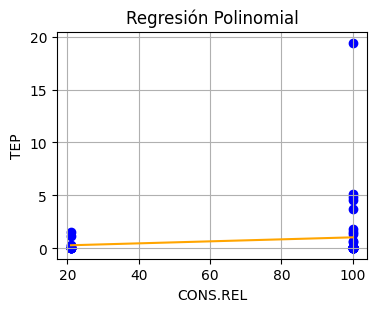

INF.FLUI
R-squared: 0.15312851763596147
7.053526513626738
[ 0.00000000e+00 -5.68714482e-06 -5.45471585e-05 -3.40801904e-04
 -1.48379564e-03 -3.57370809e-03  1.03875641e-03 -1.09126571e-04
  5.03946947e-06 -8.62093389e-08]


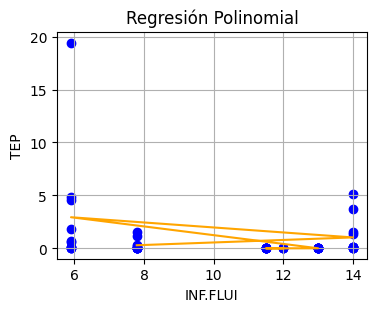

IND.TENA
R-squared: 0.15312851763596147
56.45038130478386
[  0.         -26.5376826  -36.5549846  -24.80880596   4.82519504
  30.87359647  17.83071067 -33.40059167  12.29819702  -1.39690741]


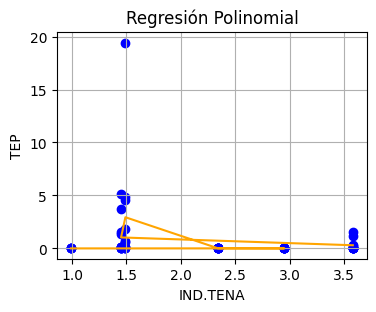

GRAVA
R-squared: 0.02250389404434172
1.1543213589743955
[ 0.         -0.12199717 -0.12194759 -0.12179886 -0.12135267 -0.12001411
 -0.11599841 -0.10395133 -0.06781008  0.04061367]


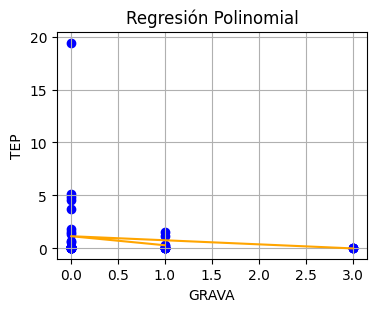

ARENA
R-squared: 0.15312851726745746
1.5680064108371736
[ 0.00000000e+00 -8.10775117e-04 -3.38137882e-03 -9.58349761e-03
 -1.99280905e-02 -2.32794186e-02  1.33012521e-02 -1.91344970e-03
  7.87705858e-05 -9.39483170e-07]


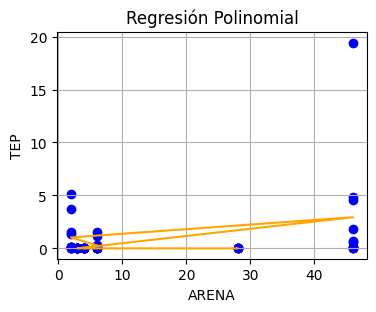

FINOS
R-squared: 0.15312851763596136
-774.8040592916743
[ 0.00000000e+00 -5.48458717e-10  1.02298703e-09  5.29571171e-08
  1.91160162e-06  3.90998071e-05 -1.63986754e-06  2.61625176e-08
 -1.87158946e-10  5.04800757e-13]


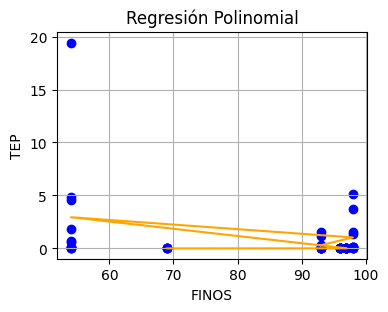

DEN.SOL
R-squared: 0.1531285176501851
-54066558.81470372
[        0.           2713404.27117599   6691926.6155895
   9807117.29533342   7591685.91648456  -2648921.75906441
 -10181949.32861918   7553818.77630698  -1960714.24338021
    178652.41784831]


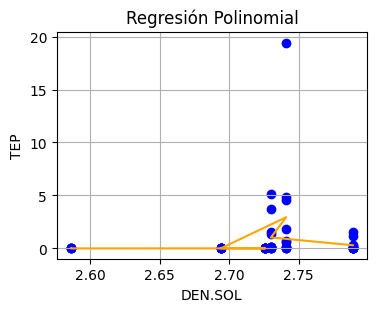

PVN
R-squared: 0.1489037558081907
365.7600670324344
[ 0.00000000e+00  2.08243095e-18 -7.54845672e-23 -4.19070640e-24
 -4.53279305e-21 -3.68319321e-18 -1.79858674e-15  2.84647976e-18
 -1.52832414e-21  2.77085368e-25]


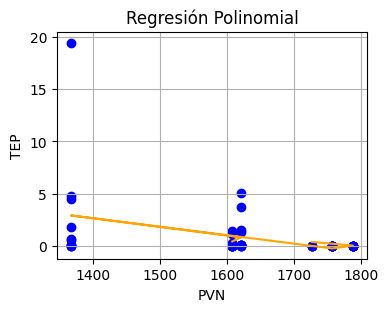

PVS
R-squared: 0.15312792893235905
-220.28160387330647
[ 0.00000000e+00  1.54923410e-19  2.25440927e-23  1.46643066e-23
  1.29215045e-20  8.55615660e-18  3.40588494e-15 -6.48726660e-18
  4.18716167e-21 -9.11631101e-25]


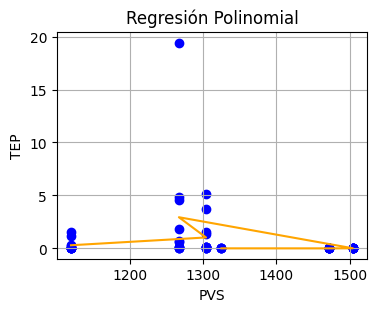

COHE
R-squared: 0.15312851763596147
-104.55629634911426
[    0.          1135.0361025  -3985.27508821  4174.2545656
  2316.55533975 -2086.83036774 -3703.08565502 -2370.97265728
   439.33855058  3534.10701259]


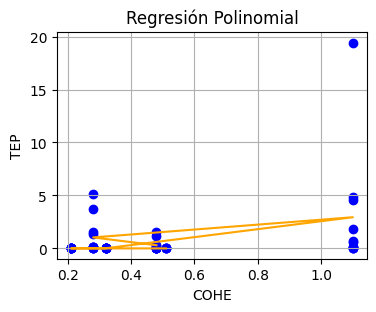

FRIC
R-squared: 0.15312851763596158
3.0436999867610295
[ 0.00000000e+00 -2.89229655e-05 -1.74781658e-04 -7.33916622e-04
 -2.25566490e-03 -3.92909040e-03  1.38315355e-03 -1.67649333e-04
  8.75336407e-06 -1.67784551e-07]


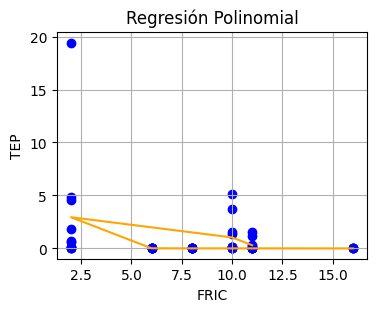

In [182]:
for index in df:
    xData = numpy.array(df[index])
    yData = numpy.array(df['TEP'])

    poly = PolynomialFeatures(degree = 9)
    X_poly = poly.fit_transform(xData[:,numpy.newaxis])
 
    poly.fit(X_poly, yData)
    lin2 = LinearRegression()
    lin2.fit(X_poly, yData)
    print(index)
    print('R-squared:',lin2.score(X_poly,yData))
    print(lin2.intercept_)
    print(lin2.coef_)
    # Visualising the Polynomial Regression results
    plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    plt.scatter(xData, yData, color = 'blue')
 
    plt.plot(xData, lin2.predict(poly.fit_transform(xData[:,numpy.newaxis])), color = 'orange')
    plt.title('Regresión Polinomial')
    plt.grid()
    plt.xlabel(index)
    plt.ylabel('TEP')
 
    plt.show()

# Función Exponencial TEA-ALL

Fitted parameters: [0.07756736 0.00714542]


PUB
RMSE: 0.19434222215396205
R-squared: 0.0023030225704754326



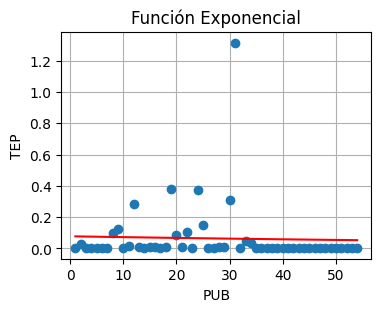

Fitted parameters: [ 3.45375558e-05 -3.15479726e+00]


VEL
RMSE: 0.18015634533557562
R-squared: 0.14302932604472707



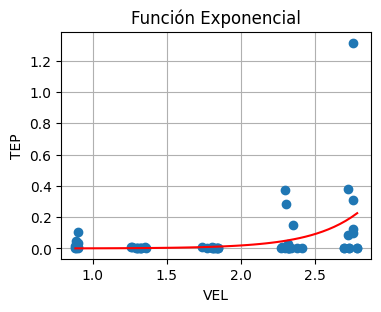

Fitted parameters: [3.52198770e+20 7.79817752e+02]


TIRANTE
RMSE: 0.14667462389124902
R-squared: 0.442957174618975



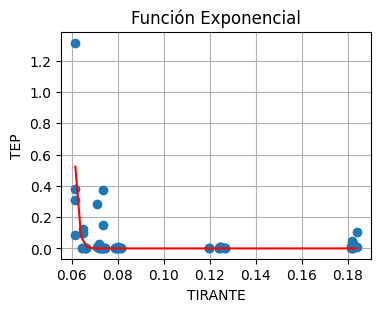

Fitted parameters: [ 1.32357328e-02 -1.61623467e+01]


GASTO
RMSE: 0.1943838093794462
R-squared: 0.0018754336351071155



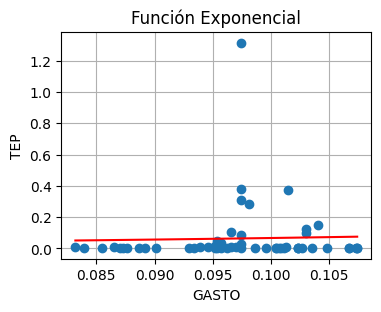

Fitted parameters: [3.68430521e+79 2.86337843e+02]


FROUDE
RMSE: 0.20441393158566196
R-squared: -0.00916266768224916



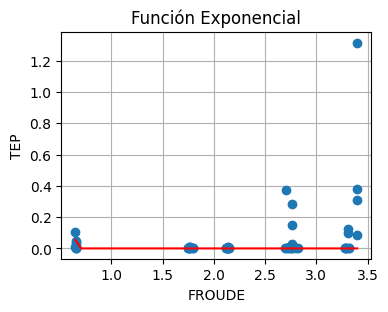

Fitted parameters: [0.09378003 0.28442901]


Tc
RMSE: 0.20451320829290426
R-squared: -0.01246044472552632



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


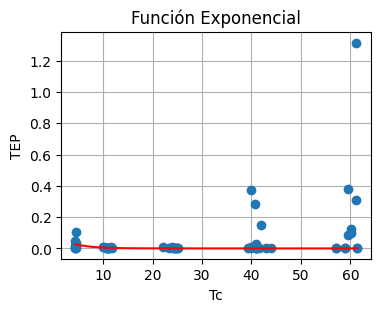

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [2.06673182 0.02433362]


TIEMPO
RMSE: 0.03361150139648476
R-squared: 0.9744540489451569



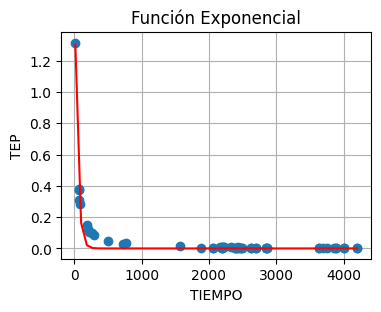

Fitted parameters: [1.43058363 0.19454803]


HUM.INI
RMSE: 0.17361110980913882
R-squared: 0.20502948789852005



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


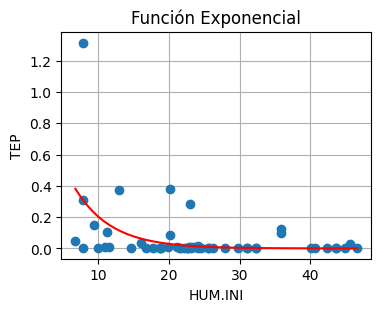

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [4.35435097e+10 2.99415632e+00]


HUM.FIN
RMSE: 0.08983301665221617
R-squared: 0.8167927201564066



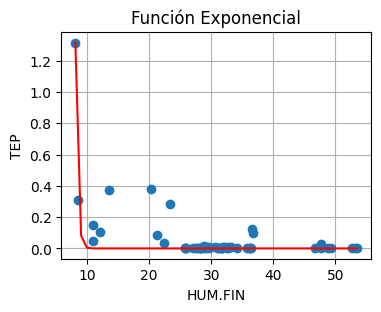

Fitted parameters: [4.32968362 7.80692611]


DIF.HUM
RMSE: 0.07263540892691511
R-squared: 0.8725266902415189



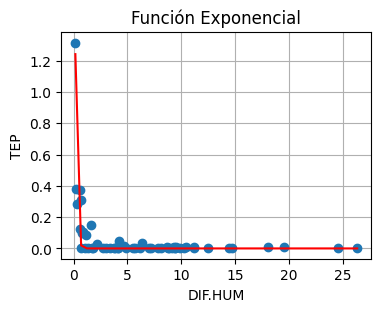

Fitted parameters: [5.25640659e+11 2.77294545e+01]


DIF.HUM.P
RMSE: 0.16720872842397014
R-squared: 0.2624002460841425



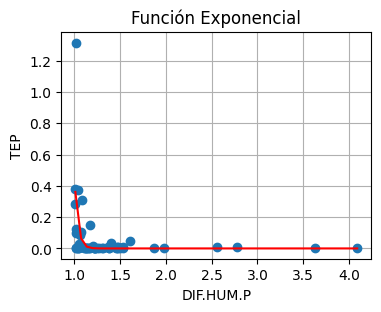

Fitted parameters: [5.24599506 2.68148782]


PESO.VOL
RMSE: 0.19120868469945973
R-squared: 0.03434834982057222



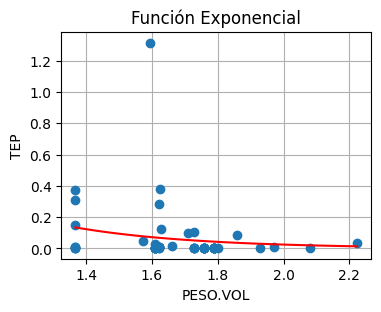

Fitted parameters: [ 0.04707236 -0.17207526]


TEP
RMSE: 0.07730558170075545
R-squared: 0.8466144613052748



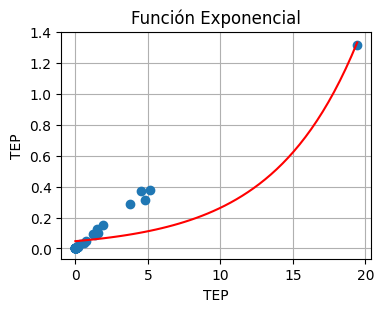

Fitted parameters: [ 0.0472965  -2.53967171]


TEA
RMSE: 0.07518971049511486
R-squared: 0.8559031744771346



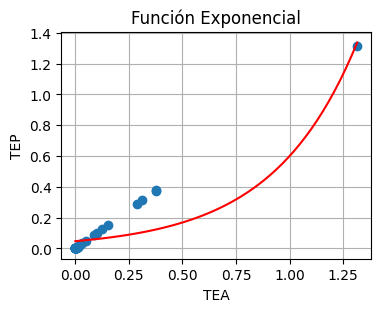

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [0.97258503 0.19710884]


HUM.NAT
RMSE: 0.18233294184539545
R-squared: 0.12626317678079668



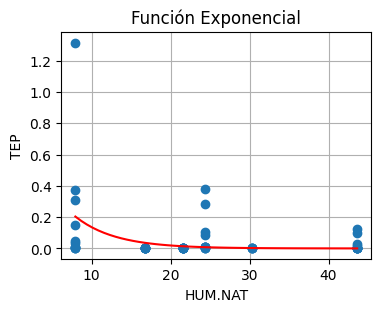

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


LL
RMSE: 0.2047726688652099
R-squared: 7.827072323607354e-14



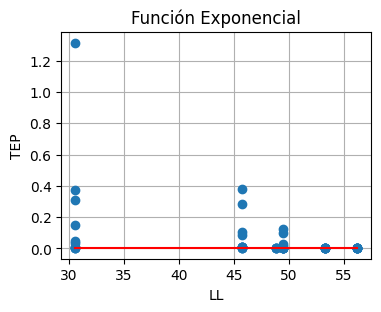

Fitted parameters: [2.10125398 0.89802999]


LP
RMSE: 0.20477266729301744
R-squared: 3.6021997606994205e-09



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


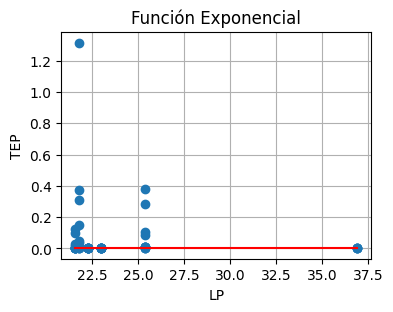

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [0.73588554 0.14677447]


LC
RMSE: 0.1927900015558152
R-squared: 0.018183435890324784



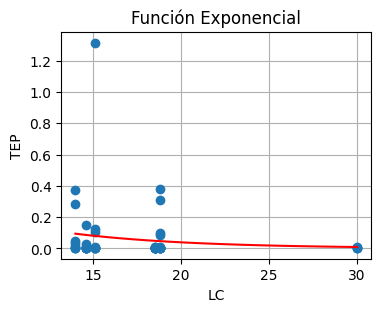

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [1.11187839e+06 1.76159953e+00]


IP
RMSE: 0.18247625083750385
R-squared: 0.13301613863805783



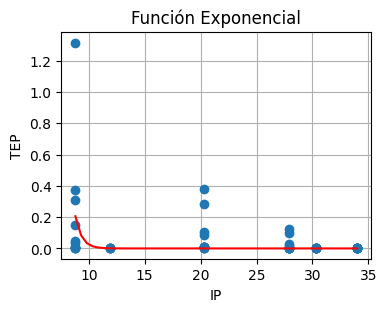

/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


Fitted parameters: [0.61099019 0.13825132]


IP.EN.LINEA.A
RMSE: 0.1797213560390318
R-squared: 0.14696674216250694



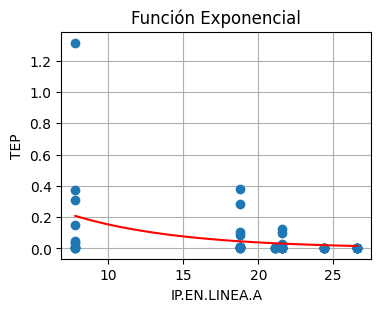

Fitted parameters: [2.59920881 0.9040268 ]


CONS.REL
RMSE: 0.2047726684957047
R-squared: -6.349178738318528e-09



/tmp/ipykernel_140/2342087299.py:3: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-b*T)


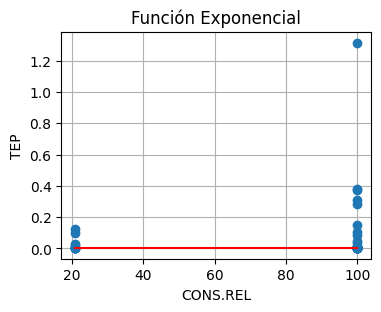

Fitted parameters: [148.20588451   1.11512251]


INF.FLUI
RMSE: 0.1821339243149925
R-squared: 0.13109814706745082



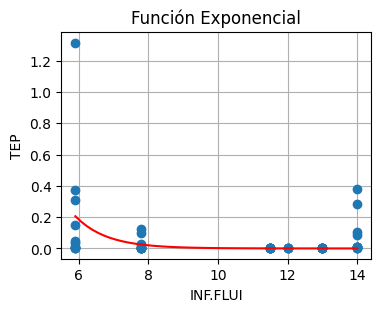

Fitted parameters: [0.2379411  0.64529045]


IND.TENA
RMSE: 0.1908706468094781
R-squared: 0.03780379877622986



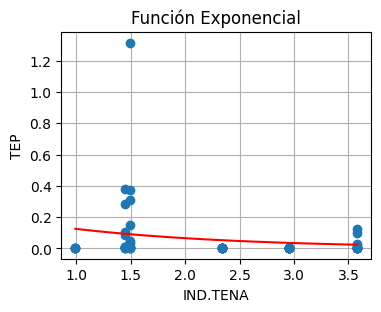

Fitted parameters: [0.08143692 1.20266955]


GRAVA
RMSE: 0.1924053638292814
R-squared: 0.022088775560300866



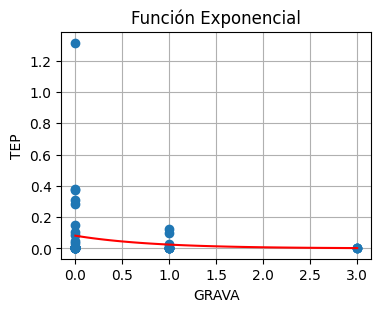

Fitted parameters: [332.42604296   4.19883942]


ARENA
RMSE: 0.20170060842598828
R-squared: -0.01627120649335856



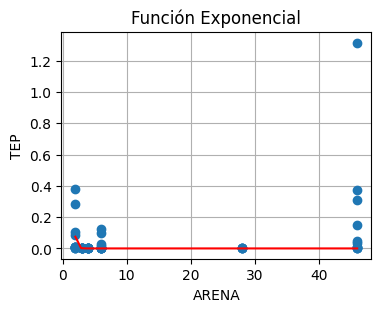

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


FINOS
RMSE: 0.2047726688652204
R-squared: 0.0



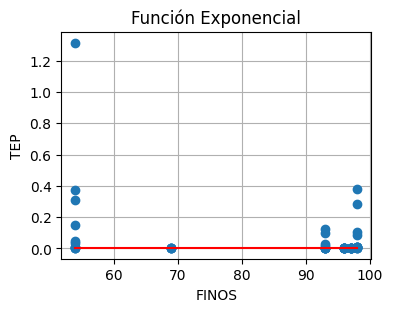

Fitted parameters: [ 1.74580218e-06 -3.84971810e+00]


DEN.SOL
RMSE: 0.19403092322859972
R-squared: 0.005506674535939227



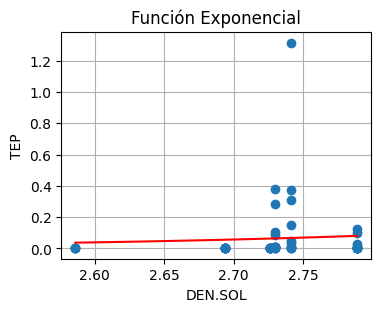

/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1. 1.]


PVN
RMSE: 0.2047726688652204
R-squared: 0.0



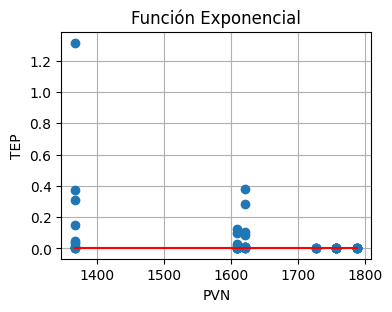

Fitted parameters: [1. 1.]


PVS
RMSE: 0.2047726688652204
R-squared: 0.0



/home/gfgarcia/notebook/jupyterenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


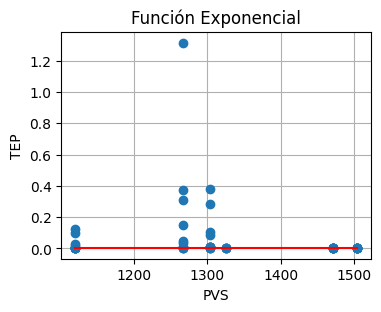

Fitted parameters: [ 0.00899668 -2.84065957]


COHE
RMSE: 0.18119936849069387
R-squared: 0.13278534003595932



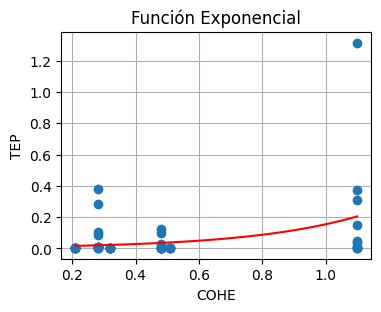

Fitted parameters: [0.49231137 0.44158742]


FRIC
RMSE: 0.18240208049607884
R-squared: 0.1255651235775822



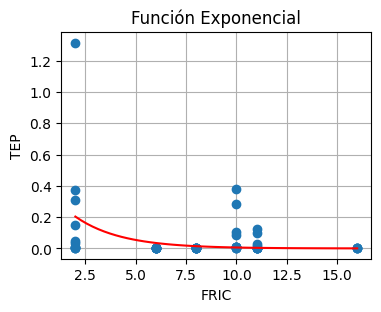

In [187]:
for index in df:
    xData = numpy.array(df[index])
    yData = numpy.array(df['TEA'])

    init_vals = [50, 0, 90, 63]
    fittedParameters, pcov = curve_fit(func, xData, yData, maxfev=7000)
    print('Fitted parameters:', fittedParameters)
    print()

    modelPredictions = func(xData, *fittedParameters) 

    absError = modelPredictions - yData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

    print()
    print(index)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()

    graphWidth = 400
    graphHeight = 300
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)
    ModelAndScatterPlot(graphWidth, graphHeight,'Función Exponencial',index,'TEP','red',xModel,yModel)

# Función Logaritmica TEA-ALL

Fitted parameters: [4.04845100e-02 7.13307515e-03 9.11127136e+01 2.22580715e-11]


PUB
RMSE: 0.1943422219827813
R-squared: 0.002303028893399506



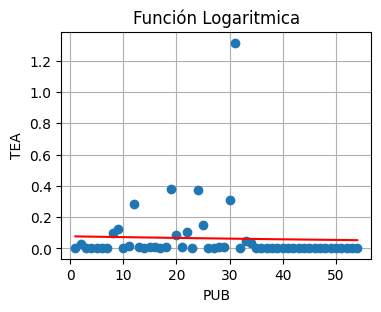

Fitted parameters: [2.82488214e-02 8.98391742e-66 9.00000000e+01 3.55935142e-02]


VEL
RMSE: 0.19456619025087774
R-squared: 0.0



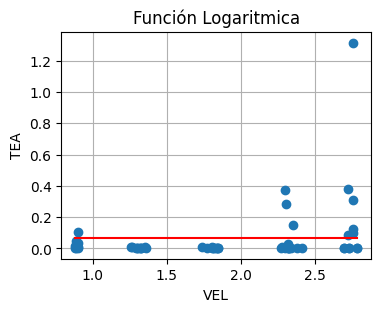

Fitted parameters: [2.84307174e-04 6.02263332e-02 9.00000001e+01 7.31205499e-05]


TIRANTE
RMSE: 0.19453458500698786
R-squared: 0.00032509695562710217



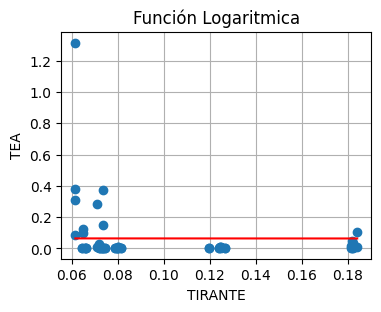

Fitted parameters: [2.82488195e-02 1.30003001e-62 9.00000000e+01 3.55935138e-02]


GASTO
RMSE: 0.1945661902508777
R-squared: 0.0



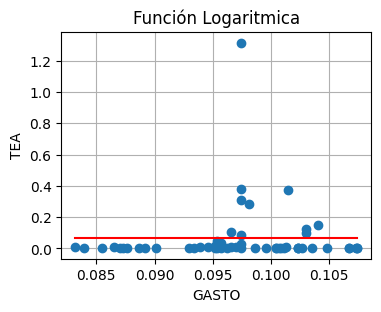

Fitted parameters: [2.82488200e-02 1.57893359e-55 9.00000000e+01 3.55935133e-02]


FROUDE
RMSE: 0.19456619025087774
R-squared: 0.0



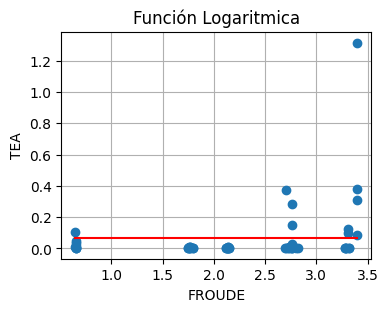

Fitted parameters: [2.82488197e-02 2.97750634e-59 9.00000000e+01 3.55935137e-02]


Tc
RMSE: 0.1945661902508777
R-squared: 0.0



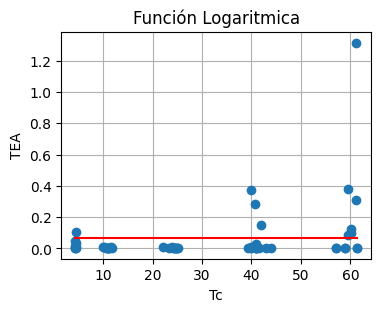

Fitted parameters: [2.16447420e-01 2.51211908e-02 9.00627525e+01 1.43946379e-02]


TIEMPO
RMSE: 0.030757793888462514
R-squared: 0.9750094615070893



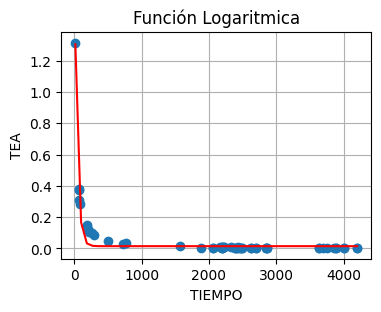

Fitted parameters: [6.52505498e-05 1.00000000e-01 9.00827461e+01 6.19299041e-22]


HUM.INI
RMSE: 0.17691564179301852
R-squared: 0.17723559063569516



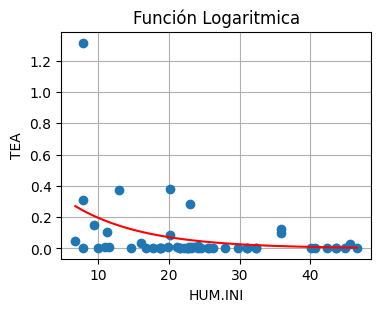

Fitted parameters: [1.38304507e-04 1.00000000e-01 9.00858299e+01 8.38994130e-18]


HUM.FIN
RMSE: 0.14392261768123973
R-squared: 0.4711629877609177



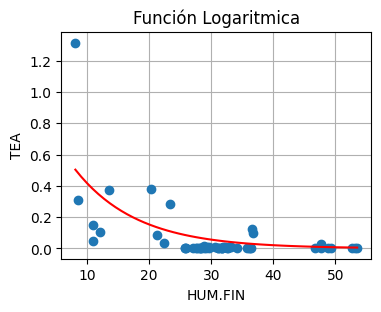

Fitted parameters: [1.78428549e-05 1.00000000e-01 9.00001900e+01 1.02196107e-14]


DIF.HUM
RMSE: 0.18260843966581206
R-squared: 0.13059093598590354



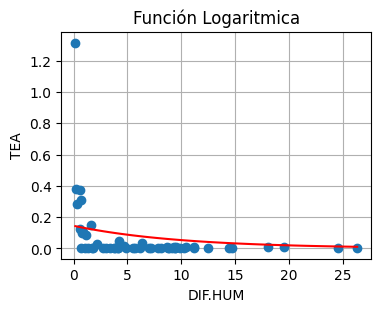

Fitted parameters: [2.86764502e-05 8.72661016e-02 9.00004995e+01 1.99958319e-05]


DIF.HUM.P
RMSE: 0.19399584104242001
R-squared: 0.005925063740080061



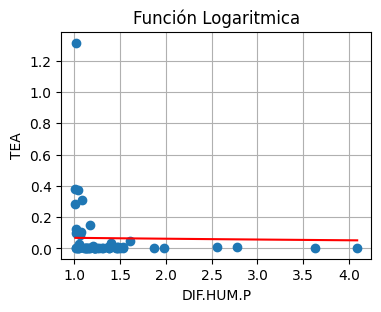

Fitted parameters: [9.71320346e-05 7.35322723e-02 9.00000001e+01 3.56941510e-05]


PESO.VOL
RMSE: 0.19440503706170525
R-squared: 0.0016620410796652774



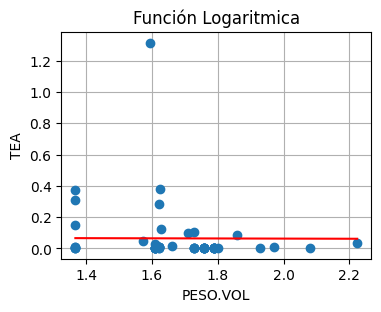

Fitted parameters: [2.82488207e-02 3.47456563e-53 9.00000000e+01 3.55935128e-02]


TEP
RMSE: 0.1945661902508777
R-squared: 0.0



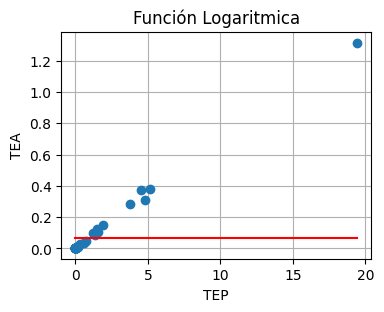

Fitted parameters: [2.82488195e-02 6.14488619e-54 9.00000000e+01 3.55935138e-02]


TEA
RMSE: 0.1945661902508777
R-squared: 0.0



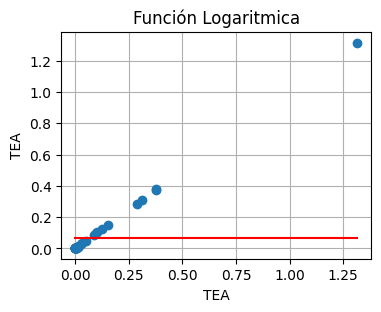

Fitted parameters: [4.85362122e-05 1.00000000e-01 9.02826800e+01 5.95793202e-12]


HUM.NAT
RMSE: 0.18336133661868836
R-squared: 0.1119644093087252



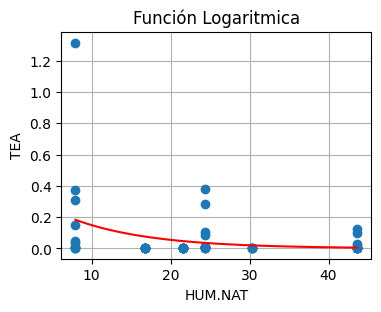

Fitted parameters: [5.20578213e-05 1.00000000e-01 1.13505433e+02 6.66776300e-35]


LL
RMSE: 0.17973272667324883
R-squared: 0.14690935683790762



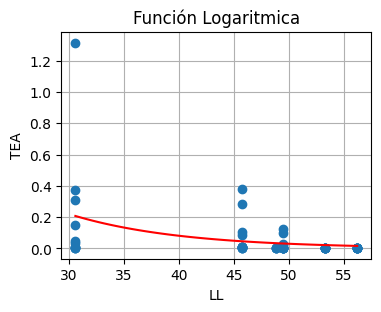

Fitted parameters: [8.25668771e-05 9.99999651e-02 9.00055932e+01 5.53540929e-11]


LP
RMSE: 0.19358799841802118
R-squared: 0.010050092144318401



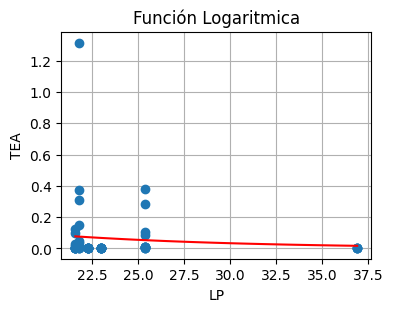

Fitted parameters: [4.36632022e-05 1.00000000e-01 9.00065638e+01 2.46897723e-16]


LC
RMSE: 0.19290717182383618
R-squared: 0.017098207999284853



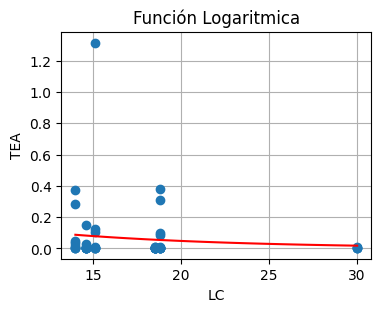

Fitted parameters: [5.21361814e-05 1.00000000e-01 9.00213085e+01 3.97038571e-17]


IP
RMSE: 0.18304392500955857
R-squared: 0.1154098279974155



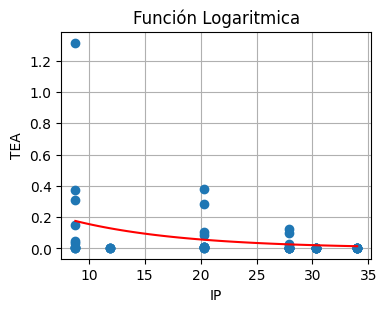

Fitted parameters: [5.14642668e-05 1.00000000e-01 9.00003812e+01 1.64549100e-13]


IP.EN.LINEA.A
RMSE: 0.1805684069118018
R-squared: 0.14283221348041697



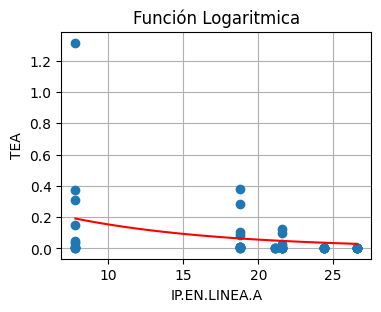

Fitted parameters: [2.82488208e-02 4.20253093e-52 9.00000000e+01 3.55935140e-02]


CONS.REL
RMSE: 0.19456619025087774
R-squared: 0.0



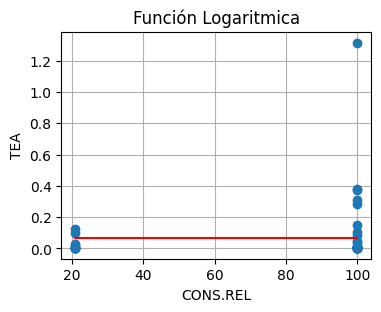

Fitted parameters: [2.41974410e-05 1.00000000e-01 9.00014594e+01 6.36729358e-13]


INF.FLUI
RMSE: 0.19000750904574043
R-squared: 0.04838910907219984



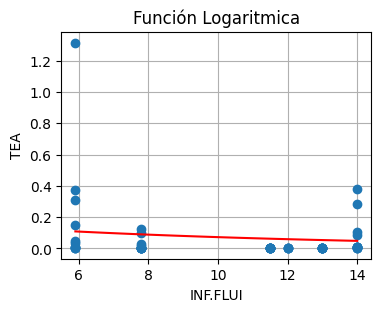

Fitted parameters: [1.02495819e-05 1.00000000e-01 9.00034853e+01 7.37196581e-26]


IND.TENA
RMSE: 0.19345909121056726
R-squared: 0.011588646702656025



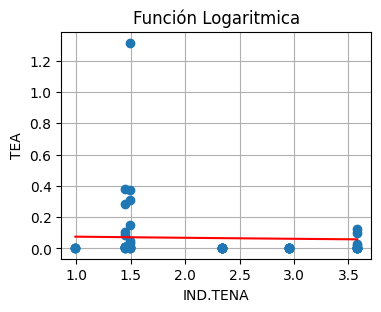

Fitted parameters: [1.18064638e-05 8.15667705e-02 1.06047951e+02 3.13246036e-05]


GRAVA
RMSE: 0.19404275207331748
R-squared: 0.0054285052744370565



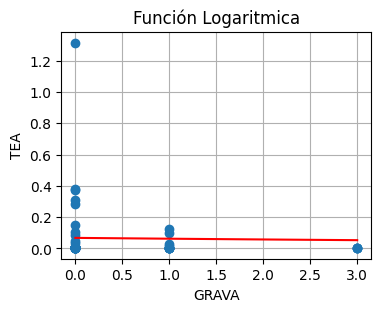

Fitted parameters: [2.82487904e-02 8.88870399e-13 1.04948849e+02 3.55935470e-02]


ARENA
RMSE: 0.1945661902510185
R-squared: -1.446176511876729e-12



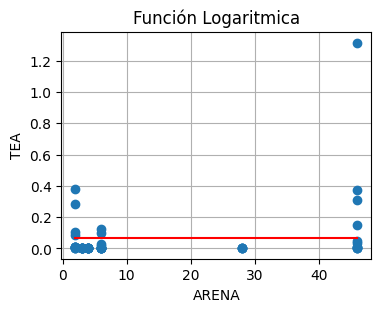

Fitted parameters: [4.87418277e-03 9.99999765e-02 9.00001544e+01 2.25794892e-02]


FINOS
RMSE: 0.1815312382034645
R-squared: 0.12950157537333207



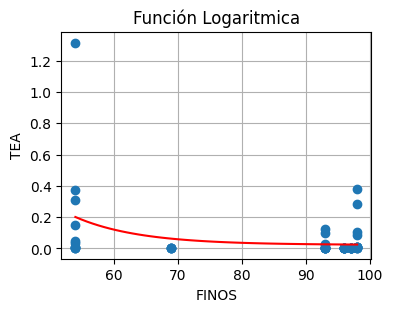

Fitted parameters: [2.82488202e-02 2.22584396e-11 9.00000000e+01 3.55935136e-02]


DEN.SOL
RMSE: 0.19456619025088065
R-squared: -2.9753977059954195e-14



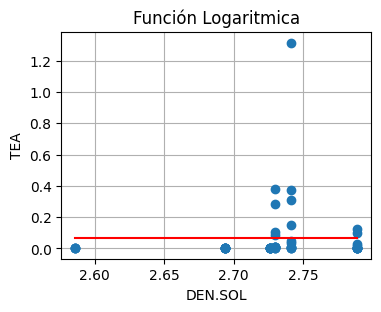

Fitted parameters: [2.31009596e+01 5.38203755e-02 9.00000000e+01 6.38423340e-02]


PVN
RMSE: 0.19456619025087774
R-squared: 0.0



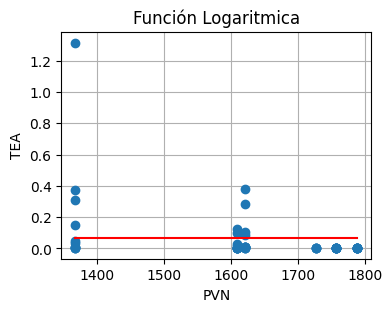

Fitted parameters: [2.26363786e+01 5.46524591e-02 9.00000000e+01 6.38423338e-02]


PVS
RMSE: 0.19456619025087774
R-squared: 0.0



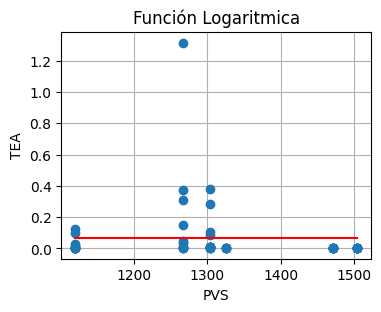

Fitted parameters: [2.82487782e-02 1.43022609e-16 9.00000000e+01 3.55935554e-02]


COHE
RMSE: 0.19456619025087774
R-squared: 0.0



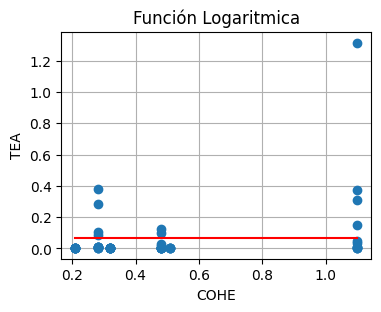

Fitted parameters: [1.95065821e-05 1.00000000e-01 9.00205437e+01 1.03482330e-17]


FRIC
RMSE: 0.18772320257736655
R-squared: 0.07294082949244829



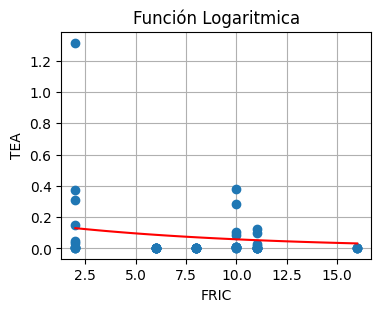

In [188]:
for index in df:
    xData = numpy.array(df[index])
    yData = numpy.array(df['TEA'])

    init_vals = [50, 0, 90, 63]
    fittedParameters, pcov = curve_fit(funcL, xData, yData, p0=init_vals, bounds=([0, 0, 90, 0], [1000, 0.1, 200, 200]))
    print('Fitted parameters:', fittedParameters)
    print()

    modelPredictions = funcL(xData, *fittedParameters) 

    absError = modelPredictions - yData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

    print()
    print(index)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = funcL(xModel, *fittedParameters)
    graphWidth = 400
    graphHeight = 300
    ModelAndScatterPlot(graphWidth, graphHeight,'Función Logaritmica',index,'TEA','red',xModel,yModel)

# Función Polinomial grado 9 TEA-Tc

PUB
R-squared: 0.14947467395404934
0.027224137107431337
[ 0.00000000e+00 -2.87348345e-03 -9.16141947e-03  3.38833291e-03
 -4.44884878e-04  2.90942575e-05 -1.04902156e-06  2.11909755e-08
 -2.24822567e-10  9.75723408e-13]


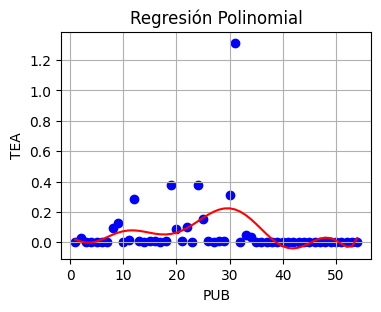

VEL
R-squared: 0.21972675548453957
5452.6490438890505
[ 0.00000000e+00 -3.22537657e+04  8.28090298e+04 -1.21149947e+05
  1.11366370e+05 -6.67542470e+04  2.61134459e+04 -6.43451801e+03
  9.07101212e+02 -5.57968243e+01]


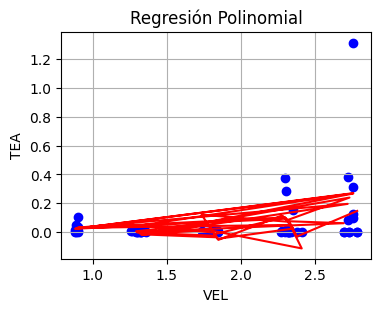

TIRANTE
R-squared: 0.4557717151929951
11029.894840662488
[ 0.00000000e+00 -9.38002486e+05  3.48024937e+07 -7.39204548e+08
  9.90380541e+09 -8.67994327e+10  4.97701400e+11 -1.80086969e+12
  3.73281396e+12 -3.37880751e+12]


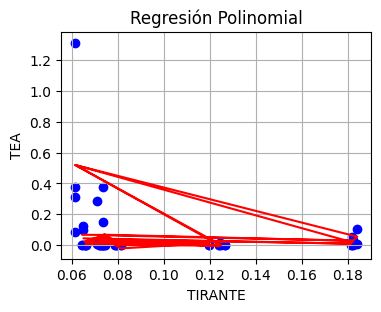

GASTO
R-squared: 0.11938716745269329
33871336.87856155
[ 0.00000000e+00 -2.77891815e+09  9.93272115e+10 -2.01766836e+12
  2.54178545e+13 -2.02379088e+14  9.82899012e+14 -2.55892601e+15
  2.07222762e+15  2.69346451e+15]


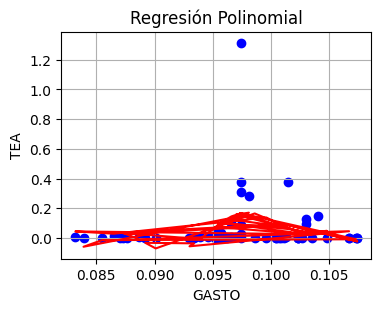

FROUDE
R-squared: 0.4640681231695234
-904.4343556733835
[ 0.00000000e+00  5.47729590e+03 -1.37506303e+04  1.88734064e+04
 -1.57603679e+04  8.37668802e+03 -2.85377500e+03  6.04249129e+02
 -7.24720944e+01  3.76464088e+00]


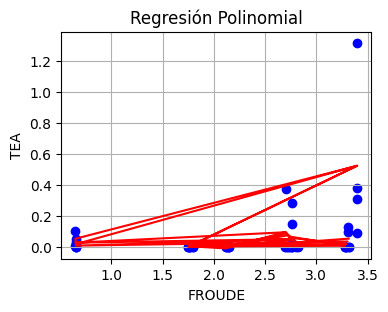

Tc
R-squared: 0.25678750604984557
0.03376851196686183
[ 0.00000000e+00 -3.35222485e-06 -3.33083235e-05 -1.59386120e-04
  2.66735018e-05 -1.91109115e-06  7.29864021e-08 -1.52907718e-09
  1.64548956e-11 -7.07995958e-14]


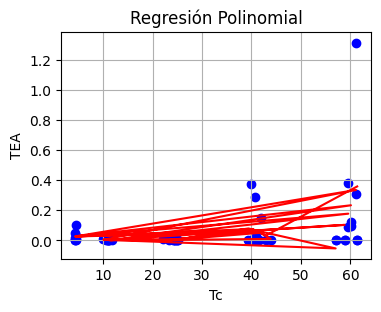

TIEMPO
R-squared: 0.2824562732416529
0.23792940765922288
[ 0.00000000e+00  4.82196701e-23  1.46238673e-28 -1.56269715e-29
 -2.43892948e-26 -3.09041814e-23 -2.48317696e-20  1.96128299e-23
 -5.18302419e-27  4.56860452e-31]


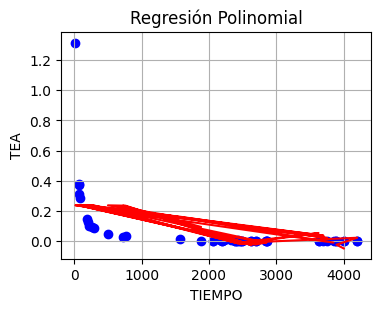

HUM.INI
R-squared: 0.23802734240679335
-1.362932290299135
[ 0.00000000e+00  4.04656362e-02  1.93920707e-01 -4.71800594e-02
  4.96890734e-03 -2.87513223e-04  9.78465651e-06 -1.95282984e-07
  2.11576846e-09 -9.60815455e-12]


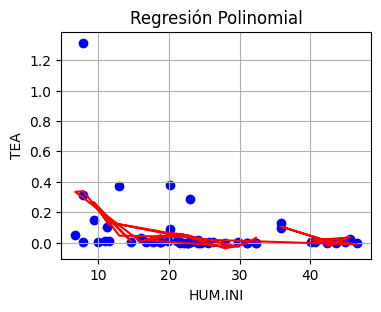

HUM.FIN
R-squared: 0.626992917366368
1.9805314745910676
[ 0.00000000e+00 -1.38908710e-04 -1.64919301e-03 -8.43236884e-03
  1.33315571e-03 -8.85275479e-05  3.12534084e-06 -6.14572761e-08
  6.36379058e-10 -2.70829542e-12]


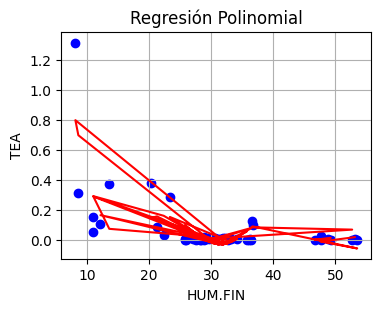

DIF.HUM
R-squared: 0.7055365399974496
1.0449625857515696
[ 0.00000000e+00 -1.87850535e+00  1.20373181e+00 -3.77206870e-01
  6.61253244e-02 -6.90902535e-03  4.38689138e-04 -1.65586805e-05
  3.40880310e-07 -2.94164315e-09]


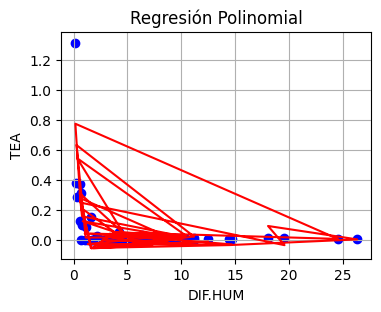

DIF.HUM.P
R-squared: 0.2573509506797347
1830.6631761785868
[ 0.00000000e+00 -8.88521683e+03  1.87515574e+04 -2.25616846e+04
  1.70399066e+04 -8.37101722e+03  2.67327244e+03 -5.34930730e+02
  6.08510576e+01 -2.99833942e+00]


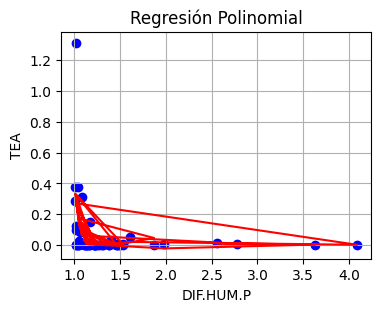

PESO.VOL
R-squared: 0.1141862506375877
90792223.5137226
[ 0.00000000e+00 -4.63554511e+08  1.04909287e+09 -1.38134560e+09
  1.16621140e+09 -6.54704356e+08  2.44409000e+08 -5.85071277e+07
  8.14950319e+06 -5.03260472e+05]


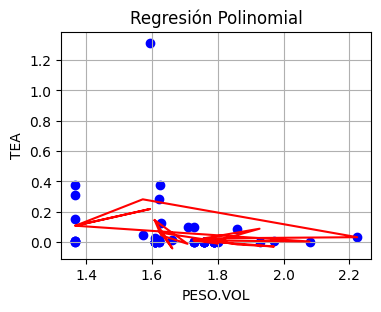

TEP
R-squared: 0.9995307309780879
0.000194909346056496
[ 0.00000000e+00  5.68469270e-02  2.00783530e-01 -6.57469789e-01
  8.41120166e-01 -5.20103523e-01  1.68281225e-01 -2.85024204e-02
  2.29212860e-03 -6.20482143e-05]


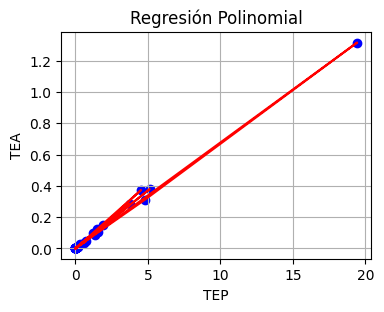

TEA
R-squared: 1.0
-4.0245584642661925e-16
[ 0.00000000e+00  1.00000000e+00 -9.55971413e-13  2.54048449e-11
 -2.94370195e-10  1.78071652e-09 -5.99289940e-09  1.11289588e-08
 -1.03655281e-08  3.55624996e-09]


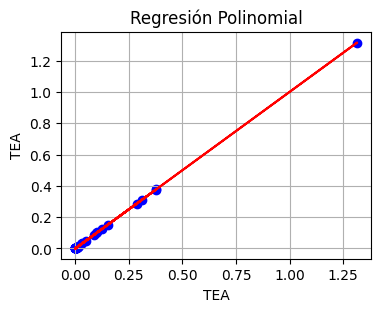

HUM.NAT
R-squared: 0.15667607999089928
0.23022802891656347
[ 0.00000000e+00 -1.83923877e-10 -3.35527623e-09 -4.11654302e-08
 -3.64104160e-07 -1.87420402e-06  1.93283106e-07 -6.93268012e-09
  9.88431089e-11 -4.31615505e-13]


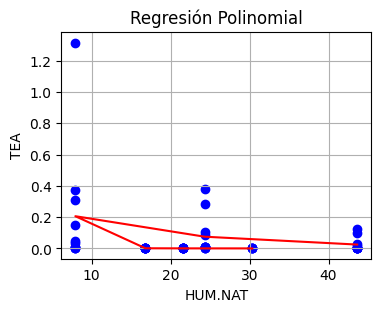

LL
R-squared: 0.15667607999090039
-29.103755143864554
[ 0.00000000e+00  5.44430298e-11  3.20152986e-09  9.39637577e-08
  1.91866157e-06  2.21352688e-05 -1.60262833e-06  4.41863777e-08
 -5.47494141e-10  2.56349256e-12]


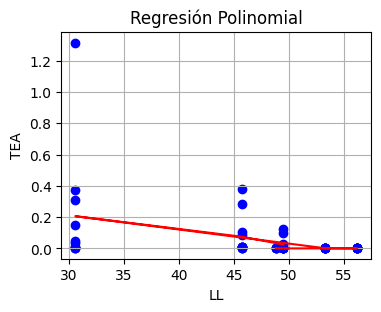

LP
R-squared: 0.15667607998998756
-3662.1344156152877
[ 0.00000000e+00  2.68369111e-06  4.83205749e-05  7.52633197e-04
  8.12412289e-03  4.92370033e-02 -6.61589200e-03  3.36750104e-04
 -7.67576905e-06  6.57270299e-08]


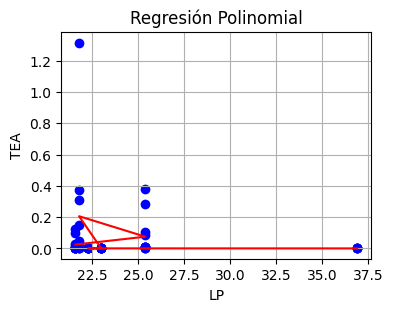

LC
R-squared: 0.11292682079781191
65.42597814900759
[ 0.00000000e+00 -7.42612622e-07 -1.27142512e-05 -1.40730230e-04
 -1.08181310e-03 -4.65998483e-03  8.74404983e-04 -6.11547499e-05
  1.89435722e-06 -2.17864317e-08]


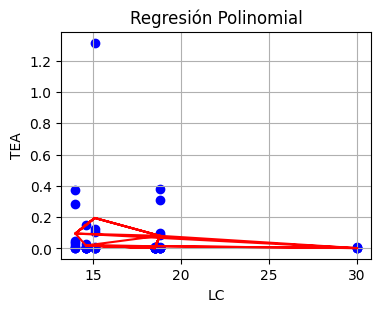

IP
R-squared: 0.15667607999089928
0.37536492400838717
[ 0.00000000e+00 -1.91566335e-09 -3.22372861e-08 -3.63074191e-07
 -2.93664481e-06 -1.37778487e-05  2.00296588e-06 -1.07378455e-07
  2.53497603e-09 -2.22621867e-11]


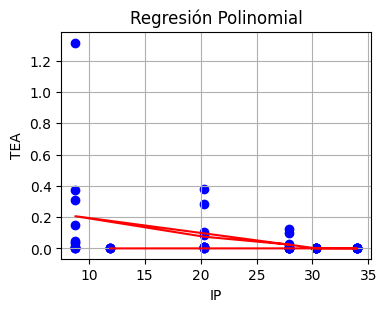

IP.EN.LINEA.A
R-squared: 0.1566760799908994
-0.4162299186979441
[ 0.00000000e+00  1.46280055e-08  2.50505473e-07  2.85122810e-06
  2.30620193e-05  1.06541890e-04 -1.90279131e-05  1.25348843e-06
 -3.64758067e-08  3.96206404e-10]


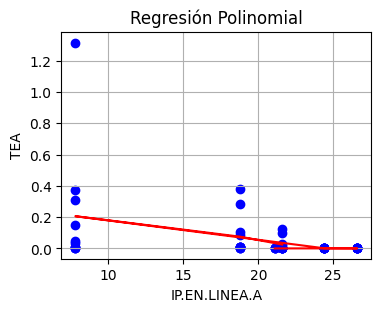

CONS.REL
R-squared: 0.010371247656613347
0.02466623396944881
[ 0.00000000e+00 -6.01853108e-36  4.70277202e-34  4.87387253e-32
  4.90976942e-30  4.91730058e-28  4.91888062e-26  4.91921212e-24
  4.91928166e-22  4.91929625e-20]


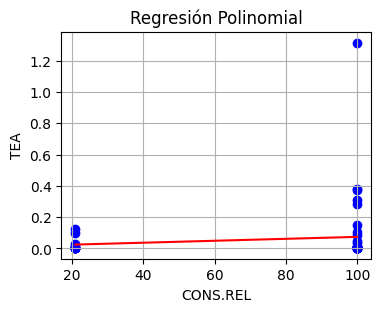

INF.FLUI
R-squared: 0.1566760799908994
0.4810986147230165
[ 0.00000000e+00 -3.73054519e-07 -3.57823099e-06 -2.23578367e-05
 -9.73570264e-05 -2.34596597e-04  6.74708145e-05 -7.00327065e-06
  3.18674738e-07 -5.34888953e-09]


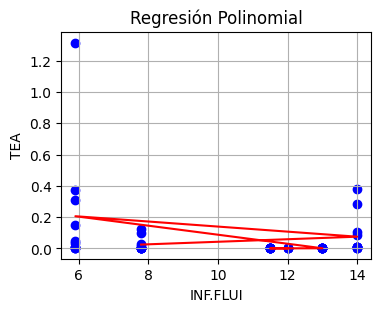

IND.TENA
R-squared: 0.1566760799908995
3.8660993972583597
[ 0.         -1.8184648  -2.50466541 -1.69934476  0.33171285  2.11658931
  1.22181051 -2.29004233  0.8433498  -0.09580346]


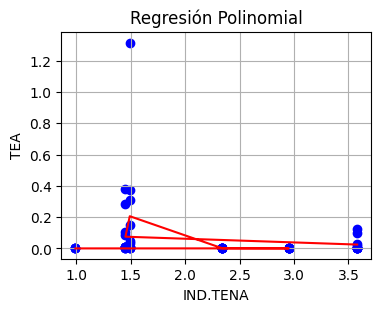

GRAVA
R-squared: 0.022096973975037182
0.08142543589743957
[ 0.         -0.00810578 -0.00810249 -0.00809261 -0.00806296 -0.00797403
 -0.00770722 -0.0069068  -0.00450553  0.00269826]


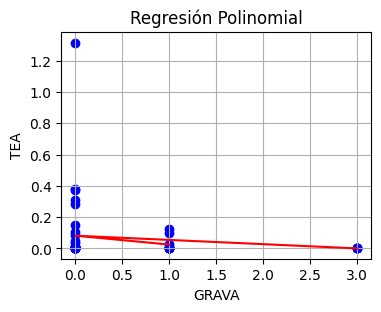

ARENA
R-squared: 0.1566760795397758
0.11321947299106917
[ 0.00000000e+00 -5.85698483e-05 -2.44268881e-04 -6.92308270e-04
 -1.43960653e-03 -1.68174507e-03  9.60742844e-04 -1.38178813e-04
  5.68794021e-06 -6.78366867e-08]


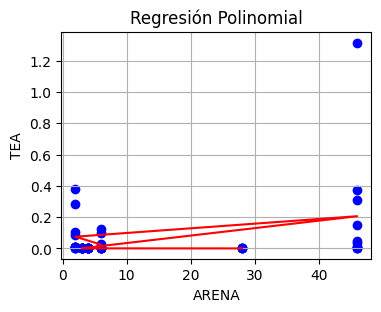

FINOS
R-squared: 0.15667607999089828
-55.3386811963825
[ 0.00000000e+00 -3.91844787e-11  7.30870164e-11  3.78350606e-09
  1.36573825e-07  2.79347413e-06 -1.17174245e-07  1.86965837e-09
 -1.33769510e-11  3.60855737e-14]


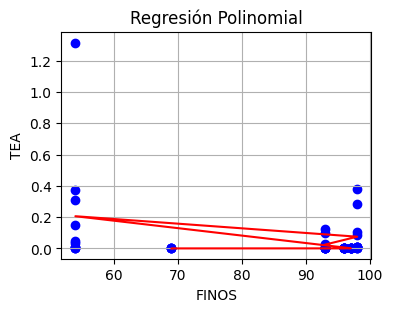

DEN.SOL
R-squared: 0.15667607996899824
-4134972.4891468217
[      0.          207614.36632795  512020.73940401  750351.05041937
  580787.11102989 -202811.58440144 -779127.80007353  578141.77938359
 -150089.9402598    13677.63439257]


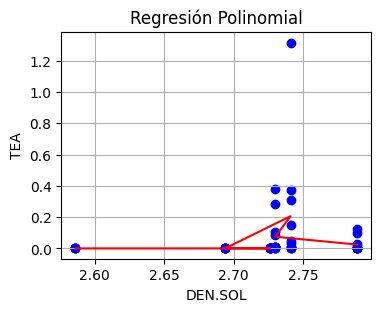

PVN
R-squared: 0.15242626650696922
24.986464781242695
[ 0.00000000e+00  1.42360144e-19 -5.16031222e-24 -2.86487083e-25
 -3.09872974e-22 -2.51792223e-19 -1.22955850e-16  1.94627670e-19
 -1.04518292e-22  1.89527111e-26]


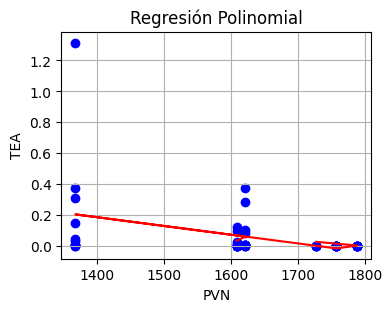

PVS
R-squared: 0.15665676388529282
-15.216423393421586
[ 0.00000000e+00  1.07032500e-20  1.55751193e-24  1.01311828e-24
  8.92712679e-22  5.91122303e-19  2.35303611e-16 -4.48169798e-19
  2.89254272e-22 -6.29732779e-26]


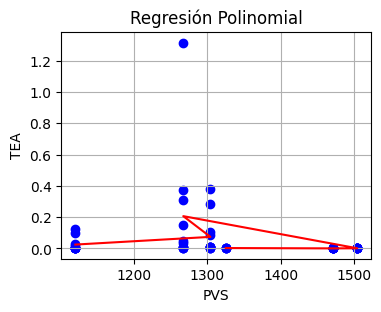

COHE
R-squared: 0.1566760799908995
-7.623690501070918
[   0.           82.85639367 -291.40308988  306.10897248  169.23847345
 -153.7131583  -271.94670277 -173.8866008    32.53936888  259.76136109]


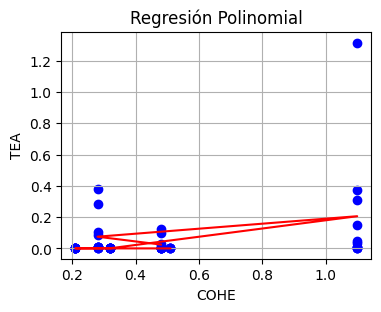

FRIC
R-squared: 0.15667607999089905
0.2127937737764325
[ 0.00000000e+00 -2.01268233e-06 -1.21627845e-05 -5.10731567e-05
 -1.56978325e-04 -2.73477267e-04  9.60702745e-05 -1.16175609e-05
  6.05019802e-07 -1.15646637e-08]


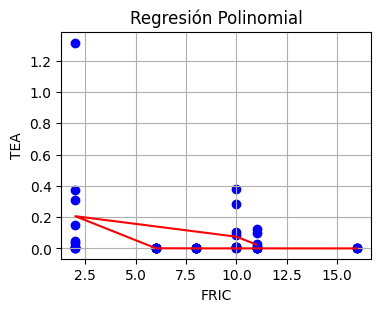

In [189]:
for index in df:
    xData = numpy.array(df[index])
    yData = numpy.array(df['TEA'])

    poly = PolynomialFeatures(degree = 9)
    X_poly = poly.fit_transform(xData[:,numpy.newaxis])
 
    poly.fit(X_poly, yData)
    lin2 = LinearRegression()
    lin2.fit(X_poly, yData)
    print(index)
    print('R-squared:',lin2.score(X_poly,yData))
    print(lin2.intercept_)
    print(lin2.coef_)
    # Visualising the Polynomial Regression results
    plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    plt.scatter(xData, yData, color = 'blue')
 
    plt.plot(xData, lin2.predict(poly.fit_transform(xData[:,numpy.newaxis])), color = 'red')
    plt.title('Regresión Polinomial')
    plt.grid()
    plt.xlabel(index)
    plt.ylabel('TEA')
 
    plt.show()